# Name: Sahar Choukir
# ID: 1002610301



##Assignment 2 : 2018 Kaggle ML & DS Survey Challenge
The purpose of this assignment is to "Tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration".

The Kaggle survey 2018 data set contains the following:
 1. 15429 rows and 396 columns
 2. It has some questions that contains multiple choice questions and others that contains texts.
 3. Most columns contian categorical data

This jupiter note will have the following sections as provided in the assignment.

1. Data Clenaing
2. Exploratory Data Analysis
3. Feature Selection
4. Model Implementation
5. Model Tuning
6. Testing and Discussion

In [1]:
#----------------------------------------------
# Import Libraries
#----------------------------------------------

import pandas as pd
import numpy as np
import math
from numpy import NaN
import os

from sklearn.model_selection import train_test_split
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model
# MOSTLY USED SKLEARN LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,  roc_curve, auc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.svm import SVC, LinearSVC




import matplotlib.pyplot as plt
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000})
cur_dir = os.getcwd()
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 500

# 1. Data Cleaning and Data Preparation

In this section, we will do the following.

1. Data Importing and deletation of unnecessary columns.
2. Investigating the data trends and Filling the missing values with appropriate reasonable values.
3. Converting categorical data into numerical.

## 1.1 Data Importing

In [2]:
# Using a small subset of original data
# full data can be found on Kaggle : https://www.kaggle.com/c/job-salary-prediction
# df = pd.read_csv("kaggle_salary.csv", encoding = "utf-8", low_memory=False, index_col=0)
df = pd.read_csv("kaggle_salary.csv", encoding = "utf-8", low_memory=False, index_col='Unnamed: 0', skiprows=[1])
or_df = pd.read_csv("kaggle_salary.csv", encoding = "utf-8", index_col='Unnamed: 0', low_memory=False)

In [3]:
df.shape

(15429, 396)

In [4]:
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system administration",Other,1,Academics/Education,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier for others to reproduce,NaN,NaN,-1,3.0
8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system administration",Other,2,Other,...,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,4.0


In [5]:
questions = or_df.head(1)

In [6]:
questions

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,...,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too expensive,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too time-consuming,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Requires too much technical knowledge,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Afraid that others will use my work without giving proper credit,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Not enough incentives to share my work,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - I had never considered making my work easier for others to reproduce,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - None of these reasons apply to me,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Other,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text,NaN


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 2 to 23857
Columns: 396 entries, Time from Start to Finish (seconds) to index
dtypes: float64(15), int64(37), object(344)
memory usage: 46.7+ MB
None


## 1.1 Deletation of Unnecessary Columns

# 1.1.1 Deletation of Unnecessary Columns

In this section we remove outliers :
    1. we remove everyone that took less than 4 minutes or more than 600 minutes to answer 
    2. Students because they genereally don\'t make that much money

In [8]:
# removing everyone that took less than 4 minutes or more than 600 minutes to answer the survey
less3 = df[round(df.iloc[:,0].astype(int) / 60) <= 4].index
df = df.drop(less3, axis=0)
more300 = df[round(df.iloc[:,0].astype(int) / 60) >= 600].index
df = df.drop(more300, axis=0)

cleaned_df = df
# removing student trolls, because a student won't generally make more than 100k a year and those  are outliers.
students = df[(df.Q6 == 'Student')].index
df = df.drop(list(students), axis=0)

# dropping all NaN because we are only interested in respondents that revealed their earnings
df = df[~df.Q9.isnull()].copy()
# dropping all salaries that are above 10000 because they are outliers 
salaries_above_500000 = df[df.Q9>500000].index
df = df.drop(list(salaries_above_500000), axis=0)

salaries_below_10000 = df[df.Q9<10000].index
df = df.drop(list(salaries_below_10000), axis=0)


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9067 entries, 2 to 23857
Columns: 396 entries, Time from Start to Finish (seconds) to index
dtypes: float64(15), int64(37), object(344)
memory usage: 27.5+ MB
None


The data contais 396 columns and 15430 rows, where most of the columns are the survey questions. The target column here is column which contains Q9 whcih is the salary. 

However, there are a lot of columns (Features) are not necessary for the purpose of predicting the salary which will be dropped:
 a. "Time from Start to Finish (seconds)", whcih tells duration each respondant spent in filling the survey and does not affect compensation 
 
 b. The "OTHER_TEXT" Columns area text responses and we believe won't affect the salary as much   'Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT', 'Q12_Part_1_TEXT','Q12_Part_2_TEXT','Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT','Q12_OTHER_TEXT','Q13_OTHER_TEXT', 'Q14_OTHER_TEXT','Q15_OTHER_TEXT','Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT', 'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT'
 
 
 c. 'index' column

In [10]:
removed_columns = ['Time from Start to Finish (seconds)', 'Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT',
'Q12_Part_1_TEXT','Q12_Part_2_TEXT','Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT','Q12_OTHER_TEXT','Q13_OTHER_TEXT',
'Q14_OTHER_TEXT','Q15_OTHER_TEXT','Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 
'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 
'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT',
'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT', 'index' ]
df.drop(removed_columns, axis = 1, inplace = True)

In [11]:
df.shape

(9067, 359)

In [12]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system administration",Other,Academics/Education,10-15,11957,No (we do not use ML methods),...,NaN,NaN,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier for others to reproduce,NaN,NaN
10,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,21152,"We have well established ML methods (i.e., models in production for more than 2 years)",...,NaN,NaN,NaN,Too time-consuming,NaN,Afraid that others will use my work without giving proper credit,NaN,NaN,NaN,NaN
12,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,132826,"We recently started using ML methods (i.e., models in production for less than 2 years)",...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN
14,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,35826,We are exploring ML methods (and may one day put a model into production),...,NaN,NaN,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Investigate Missing Values, Removing and Imputation 

### 1.2.1 Investigate missing values 

Read data contains a lot of missing data that can take many mechanics and the most common one are of these types : 

1. Missing Completely at Random (MCAR)

2. Missing at Random (MAR)

3. Missing Not at Random (MNAR)

The kaggle dataset constains data of type Missing Not at Random (MNAR) because there is a reason why data was missed. There are many reason for missing data, it could be one of the following:

1. Intentionally missed for privacy purposes.
2. Individual could not understand the question.
3. No enough time to complete questionnaire.
4. Data not stored appropriately during data collection.
5. Information is not available.
6. Human error.


To preceed in analyzing data, we will use the following methods :

1. Visualize the missing data in heat map.
2. Find percentage of NaN in each feature and plot them.
3. We will drop all features that contain greater than 50% of missing data isntead of imputing the data because we don't d want to distort the data and don't have enough information to impute it. 

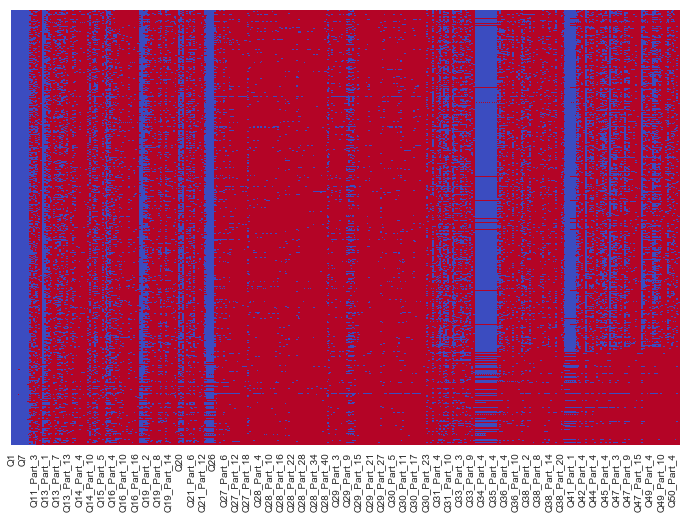

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [14]:
# finding the percentage of missing value in all features
NaN_Percentage = df.isnull().mean().sort_values(ascending=True)
print(NaN_Percentage)

Q1                     0.000000
Q2                     0.000000
Q3                     0.000000
Q4                     0.000000
Q6                     0.000000
Q7                     0.000000
Q9                     0.000000
Q8                     0.000551
Q10                    0.002868
Q5                     0.007941
Q12_MULTIPLE_CHOICE    0.026359
Q18                    0.035183
Q23                    0.042793
Q24                    0.044006
Q25                    0.045329
Q26                    0.045550
Q34_Part_5             0.147789
Q34_Part_6             0.147789
Q34_Part_1             0.147789
Q34_Part_4             0.147789
Q34_Part_3             0.147789
Q34_Part_2             0.147789
Q39_Part_1             0.153083
Q39_Part_2             0.153083
Q35_Part_3             0.154075
Q35_Part_4             0.154075
Q35_Part_6             0.154075
Q35_Part_5             0.154075
Q35_Part_2             0.154075
Q35_Part_1             0.154075
                         ...   
Q28_Part

we can observe that there are a lot of features having missing values greater than 50%. Most of These features are due to the multiple choice questions. We can also see from numerical percentage above that Q38_Part_19 and Q38_Part_20 having almost 100% all values are missed or blank. Therefore, these columns will be dropped.

To investigate the multiple choice questions affect on the data and identify the features along with its multiple choice feature that has missing values greater than 50%, we did the follwing:

 1. Identify the multiple choice questins: "Q11","Q13","Q14","Q15","Q16","Q19","Q21","Q27","Q28","Q29","Q30","Q31","Q33","Q36","Q38","Q41","Q42","Q44","Q45","Q47","Q49","Q50".

    
 2. Combine multiple choice questions into a single column with contents from other columns 



In [15]:
# Identify the multiple choice questions that are strings 
mcq = ["Q11","Q13","Q14","Q15","Q16","Q19","Q21","Q27","Q28","Q29","Q30","Q31","Q33","Q36","Q38","Q41","Q42","Q44","Q45","Q47","Q49","Q50"]

In [16]:
# 1.create a copy of data frame for purpose of investigating null in MCQ
tested_df = df.copy()

# 2. for loop to iterate through every question with MCQ
for k in mcq:
    # 3.find the columns which start with the question number by using startswith
    Auxiliary_Col = [col for col in tested_df if col.startswith(k)]
    # 4.filling all missed values or NaN with blanks 
    tested_df[Auxiliary_Col] = tested_df[Auxiliary_Col].fillna('')
    # 5.convert the columns to string  
    tested_df[Auxiliary_Col] = tested_df[Auxiliary_Col].astype(str)
    # 6.Join columns (MCQ) with same question
    tested_df[k] = tested_df[Auxiliary_Col].apply(lambda y: ''.join(y), axis=1)
    # 7. dropping the individual columns 
    tested_df.drop(Auxiliary_Col, axis = 1, inplace = True)

In [17]:
# replacing blanks with NaN in all the data
tested_df = tested_df.replace(r'^\s*$', np.nan, regex=True)

In [18]:
# finding the percentage of missing values after joining each question with its MCQ
Test_Percentage = tested_df.isnull().mean().sort_values(ascending=True)
print(Test_Percentage)

Q1                     0.000000
Q2                     0.000000
Q3                     0.000000
Q4                     0.000000
Q9                     0.000000
Q6                     0.000000
Q7                     0.000000
Q8                     0.000551
Q10                    0.002868
Q5                     0.007941
Q11                    0.011139
Q12_MULTIPLE_CHOICE    0.026359
Q13                    0.027683
Q14                    0.030771
Q15                    0.032646
Q16                    0.033859
Q18                    0.035183
Q19                    0.037499
Q21                    0.041359
Q23                    0.042793
Q24                    0.044006
Q25                    0.045329
Q26                    0.045550
Q31                    0.102680
Q33                    0.107533
Q38                    0.137311
Q34_Part_2             0.147789
Q34_Part_3             0.147789
Q34_Part_4             0.147789
Q34_Part_5             0.147789
                         ...   
Q34_Part

We can observe from above that all columns have missing values less than 50%. 

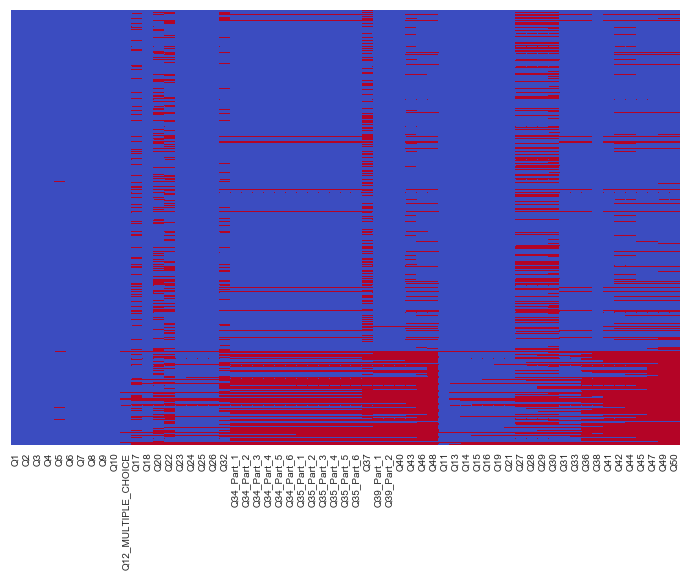

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(tested_df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

### 1.2.2 Imputation Based on Data Dependancy Trend

We reduced the number of missing data but we still have some that we can remove by imputation. 



Imputation is the process of substitute a missing value with another value based on an inference from the given data. Inference will be based on data that have no missing data : Q1-Q2-Q3-Q4-Q6-Q8 can be used 

There are many techniques used in imputation: 
1. Imputation by Mean or Median. 
2. Imputation by Hot/Cold Deck. 
3. Imputation by Regression (Interpolate). 
4. Imputation by Most Frequent Category. 
5. Imputation by Random Sample. 
6. Imputation by most frequent on mode() based on two inference or more. 

**WARNING:** 
Doing imputation without figuring out a good inference or dependancy in your features could cause distoration and skewness in the overall dataset. Therfore, here we will use imputation by figuring out a dependacy between features which could give a solid reason to do that substituation.  The following Questions will be used as inference: 

* Q2: What is your age (# years)?
* Q6: Select the title most similar to your current role (or most recent title if retired)?
* Q8: How many years of experience do you have in your current role?

In [20]:
# find percentage of missing value in Q8 along with Title or job of participant. 
print (pd.DataFrame({'NaN % Q8':df[df['Q8'].isnull()]['Q6'].value_counts(normalize=True)}))

                    NaN % Q8
Business Analyst         0.4
Research Scientist       0.2
Data Scientist           0.2
Consultant               0.2


We can see that business analyst has the most missing values or NaN percentage in Q8 can have a good inference from Q6 (Job), Therefore, to imputate for any missing value in Q8 we can use Q6 with mode() method which will make a good imputation from both features of Job.

In [21]:
# Imputate the missing value in Q8 by using inference from both Q2(age) and Q6(Title)
df['Q8'] = df.groupby(['Q6']).Q8.transform(lambda y: y.fillna(y.mode()[0]))

In [22]:
tested_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q33,Q36,Q38,Q41,Q42,Q44,Q45,Q47,Q49,Q50
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,18668,No (we do not use ML methods),...,NaN,NaN,None/I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system administration",Other,Academics/Education,10-15,11957,No (we do not use ML methods),...,GitHub,DataCamp,None/I do not know,Slightly importantSlightly importantVery important,Not applicable (I am not involved with an organization that builds ML models),I have never performed this task,When building a model that was specifically designed to produce such insights,None/I do not use these model explanation techniques,"Share code on Github or a similar code-sharing repositoryShare data, code, and environment using a hosted service (Kaggle Kernels, Google Colaboratory, Amazon SageMaker, etc.)Share data, code, and environment using containers (Docker, etc.)Share code, data, and environment using virtual machines (VirtualBox, etc.)Define all random seeds",Too expensiveI had never considered making my work easier for others to reproduce
10,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,21152,"We have well established ML methods (i.e., models in production for more than 2 years)",...,"Dataset aggregator/platform (Socrata, Kaggle Public Datasets Platform, etc.)I collect my own data (web-scraping, etc.)Google SearchGoogle Dataset Search",Udacity,None/I do not know,Not at all importantVery importantSlightly important,Revenue and/or business goals,I have never performed this task,When building a model that was specifically designed to produce such insightsWhen first exploring a new ML model or dataset,Examine feature correlationsDimensionality reduction techniquesPlot predicted vs. actual resultsPrint out a decision tree,"Share data, code, and environment using a hosted service (Kaggle Kernels, Google Colaboratory, Amazon SageMaker, etc.)Make sure the code is well documentedMake sure the code is human-readableDefine all random seedsInclude a text file describing all dependencies",Too time-consumingAfraid that others will use my work without giving proper credit
12,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,132826,"We recently started using ML methods (i.e., models in production for less than 2 years)",...,"I collect my own data (web-scraping, etc.)",UdacityCourseraKaggle Learn,None/I do not know,Slightly importantSlightly importantVery important,Other,I have never performed this task,I do not explore and interpret model insights and predictions,None/I do not use these model explanation techniques,"Share data, code, and environment using containers (Docker, etc.)Make sure the code is well documentedMake sure the code is human-readableDefine all random seedsInclude a text file describing all dependencies",Too time-consumingNot enough incentives to share my work
14,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,35826,We are exploring ML methods (and may one day put a model into production),...,University research group websitesNon-profit research group websitesGitHubOther,None,FiveThirtyEight.comArXiv & PreprintsMedium Blog Posts,Very importantVery importantSlightly important,Metrics that consider accuracyMetrics that consider unfair bias,Difficulty in identifying groups that are unfairly targetedDifficulty in collecting enough data about groups that may be unfairly targeted,For all models right before putting the model in productionWhen determining whether it is worth it to put the model into productionWhen first exploring a new ML model or dataset,Examine feature importancesDimensionality reduction techniquesPlot predicted vs. actual resultsSensitivity analy

As we have here different type of features, multiple choice question, single categorical question and single numerical question . We have to do a for loop to imputate each type of feature.  
All of them will be imputated by taking an inference from Q6 the title (job) of participant.


* Imputate Single Categorical Question
The missing values and NaN will be replaced by value based on inferernce from Q6 by using mode() by collecting and organizing data to count the frequency of each result. The folllowing are single categorical questions. "Q10","Q12_MULTIPLE_CHOICE", "Q17","Q18","Q20","Q22","Q23","Q24","Q25","Q26","Q32","Q39_Part_1","Q39_Part_2","Q40","Q43","Q46","Q48"

In [23]:
SMCQ = ['Q5', 'Q10','Q12_MULTIPLE_CHOICE',"Q17","Q18","Q20","Q22","Q23","Q24","Q25","Q26","Q32","Q37", "Q39_Part_1","Q39_Part_2","Q40","Q43","Q46","Q48"]

In [24]:
def Imputate_SingCat(List):
    # loop to run inside list of single question 
    for k in List:
        # imputate missing value or NaN based on inference from Q6 title of partcipant 
        df[k] = df.groupby(['Q6'])[k].transform(lambda y: y.fillna(y.mode()[0]))

In [25]:
# call function to imputation singel catergorical question
Imputate_SingCat(SMCQ)

* Imputate Multiple Choice Numerical Question

As we have here a numerical values, we will not use mode() method, rather we will use the mean() of that column and inference from Q6 title of participant.

In [26]:
SNumMCQ = ['Q34','Q35']

In [27]:
def Imputate_SingNum(List):
    # loop to run inside list of numerical question
    for k in List:
        # find the MCQ for each question
        Auxiliary_Col = [col for col in df if col.startswith(k)]
        #if col list is not empty we go ahead
        if Auxiliary_Col:
            df[Auxiliary_Col] = df[Auxiliary_Col].astype(float)
            for i in Auxiliary_Col:
                df[i] = df.groupby(['Q6'])[i].transform(lambda y: y.fillna(y.mean()))

In [28]:
# call function to imputate single MC numerical questions
Imputate_SingNum(SNumMCQ)

* Imputate Multiple Choice Questions

Here we will have to imputate a categorical multiple choice questions. As most steps above, same steps just we added some check points as we are dealing with a lot of columns here just to make sure nothing is missed. The following steps taken:

1. Identify the multiple choice questions, and group them in list. This will be passed to Imputation function of MCS.
2. Creat a function that to take care of imputation MCQ.
3. Find columns which start with the same question number.
4. Fill all missed values or NaN with "MISSED" as it was left empty from respondant intentationally.
5. Join columns (MCQ) with same question to create new column.
6. Imputate all MISSED value with inference from mode() of Q6 the title of participant.
7. Rearrange data to its original columns by splitting new column and dropping individula columns.

All missed data will be imputated by using the mode based inferernce from Q6 title of partcipants

In [29]:
# 1. Identify the MULTIPLE CHOICE QUESTIONS THAT ARE CATEGORICAL
CMCQ = ["Q11","Q13","Q14","Q15","Q16","Q19","Q21","Q27","Q28","Q29","Q30","Q31","Q33","Q36","Q38","Q41","Q42","Q44","Q45","Q47","Q49","Q50"]

In [30]:
#2.creating function to imputate MCQ 
def Imputate_Multi(List):
    # 2.1 create a loop to run inside list of MCQ
    for j in List:
        
        # 3. find the columns that start with the same question number
        Auxiliary_Col = [col for col in df if col.startswith(j)]
        
        # 3.1 check if there is matching question from list of MCQ
        if Auxiliary_Col:
            check = ''
            i=0
            
            # 3.2 run a loop for every individual column and create counter for sequence of rows
            for z in Auxiliary_Col:
                i=i+1
                
                # 4. substitute NaN with MISSED
                df[z] = df[z].fillna('MISSED')
                
                # 4.1 check counter for row, as long it is less than total length, it will continue
                if(i<len(Auxiliary_Col)):
                    
                    # 4.2 creating a check to follow what we suppose to replace in point 8 below this code
                    check  = check +'MISSED---'
                else: 
                    check  = check +'MISSED'
            
            # 5. join all the columns for the same question from MCQ and create new column Auxikiary_Col in the original dataset        
            df[j] = df[Auxiliary_Col].apply(lambda y: '---'.join(y), axis=1)
            
            # 6. imputate "MISSED" in check with the mode of Q6. In case the column itself was "MISSED" in checking from begining, we take the second imputation by mode 
            df[j] = df.groupby(['Q6'])[j].transform(lambda y: y.replace(check,(y.value_counts().index[0])) if y.value_counts().index[0]!=check else y.replace(check,(y.value_counts().index[1])))
            
            # 7. dropping the previous individual columns
            df.drop(Auxiliary_Col, axis = 1, inplace = True)
            
            # 8. splitting our new column to create individual columns with NaN replaced
            df[Auxiliary_Col] = df[j].str.split('---',expand=True)

In [31]:
# call function to imputate multiple choice question
Imputate_Multi(CMCQ)

In [32]:
NaN_Percentage = df.isnull().mean().sort_values(ascending=True)
print(NaN_Percentage)

Q1             0.0
Q31_Part_2     0.0
Q31_Part_1     0.0
Q31            0.0
Q30_Part_25    0.0
Q30_Part_24    0.0
Q30_Part_23    0.0
Q30_Part_22    0.0
Q30_Part_21    0.0
Q30_Part_20    0.0
Q30_Part_19    0.0
Q30_Part_18    0.0
Q30_Part_17    0.0
Q30_Part_16    0.0
Q30_Part_15    0.0
Q30_Part_14    0.0
Q30_Part_13    0.0
Q30_Part_12    0.0
Q30_Part_11    0.0
Q30_Part_10    0.0
Q31_Part_3     0.0
Q31_Part_4     0.0
Q31_Part_5     0.0
Q31_Part_6     0.0
Q36_Part_1     0.0
Q36            0.0
Q33_Part_11    0.0
Q33_Part_10    0.0
Q33_Part_9     0.0
Q33_Part_8     0.0
              ... 
Q16_Part_16    0.0
Q16_Part_15    0.0
Q16_Part_14    0.0
Q16_Part_13    0.0
Q19_Part_3     0.0
Q27_Part_5     0.0
Q19_Part_15    0.0
Q19_Part_17    0.0
Q27_Part_3     0.0
Q27_Part_2     0.0
Q27_Part_1     0.0
Q27            0.0
Q21_Part_13    0.0
Q21_Part_12    0.0
Q21_Part_11    0.0
Q21_Part_10    0.0
Q21_Part_9     0.0
Q19_Part_16    0.0
Q21_Part_8     0.0
Q21_Part_6     0.0
Q21_Part_5     0.0
Q21_Part_4  

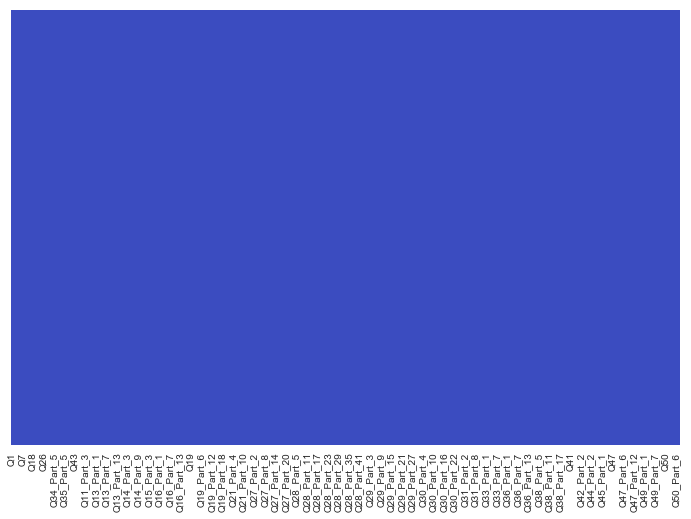

In [33]:
# final step ploting heat map to check if there is any hiden null value 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

### 1.3 Converting Categorical Data into Numerical 

To create a dataframe ready for machine learning algorithms, categorical data need to be converted to numerical data. There are different methods to do so and  they are :
 1. Label Encoding  is simply converting each value in a column to a number. For example, the body_style column contains 5 different values. We could choose to encode it like this:

united states -> 0
india -> 1
canada -> 2
..
This method is very simple but it could infer an order to the data that does not exist and do not male sense. 
2. One Hot Encoding :
 the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. This will be the method used here . 



Therfore, here we have to do the following: 

1. Convert categorical questions in to numerical. In converting categorical data into numerical, we will use one hot encoding provided by pandas. 


2. Rescale single numerical. 

As these values are already numerical, we will have to rescale them into values between 0-1. 




### 1.3.1 Converting Single Categorical Questions

In [34]:
SCatMCQ = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8","Q10","Q12_MULTIPLE_CHOICE","Q17","Q18","Q20","Q22","Q23","Q24","Q25","Q26","Q32","Q37", "Q39_Part_1","Q39_Part_2","Q40","Q43","Q46","Q48"]

In [35]:
# defining original sdf as global to avoid confusion of considering it as local when we concatinate below
global df
# loop to run inside each single question in list above
for k in SCatMCQ:
    # check if the column is in global oringal data
    if k in df:
        # if it is in there, we proceed 
        # create dummies 
        df_dummies = pd.get_dummies(df[k], prefix = k) # add prefix so each split dummy take question number it belongs
        # we concatinate the dummies with original data such that we have orginal data for single questions + dummies
        df_test = pd.concat([df,df_dummies[df_dummies.columns[:-1]]], axis = 1)
        # we again store all data back to original global one but we drop the columns that are no longer dummies, rather we will use dummies generated from them
        df = df_test.drop([k], axis = 1) 

### 1.3.2 Converting Multiple Categorical Data into numerical 

In [36]:
for k in CMCQ:
    Auxiliary_Col = [col for col in df if col.startswith(k)]
    for j in Auxiliary_Col: 
        df[j] = np.where(df[j]=='MISSED', 0, 1)

### 1.3.3 Converting Single Numerical Questions by Rescalling

In [37]:
# create a numerical column that contains a list of columns coming from Q34 and Q35
NC = [col for col in df if col.startswith('Q34')] + [col for col in df if col.startswith('Q35')] 

# Rescal the values in columns into value between 0 & 1 by using Minmax scale 
df[NC]=(df[NC]-df[NC].min())/(df[NC].max()-df[NC].min())

In [38]:
df.head()

,Q9,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q35_Part_1,Q35_Part_2,Q35_Part_3,...,Q46_30-40,Q46_40-50,Q46_50-60,Q46_60-70,Q46_70-80,Q46_80-90,Q48_I am confident that I can explain the outputs of most if not all ML models,Q48_I am confident that I can understand and explain the outputs of many but not all ML models,Q48_I do not know; I have no opinion on the matter,"Q48_I view ML models as ""black boxes"" but I am confident that experts are able to explain model outputs"
2,18668,0.164974,0.233081,0.136454,0.189053,0.076902,0.113769,0.308782,0.288333,0.131744,...,0,0,0,0,0,0,0,1,0,0
7,11957,0.000000,0.300000,0.500000,0.000000,0.000000,0.200000,0.500000,0.200000,0.300000,...,0,0,0,0,0,0,0,0,1,0
10,21152,0.550000,0.100000,0.200000,0.050000,0.000000,0.100000,0.700000,0.300000,0.000000,...,0,0,1,0,0,0,0,1,0,0
12,132826,0.400000,0.000000,0.000000,0.000000,0.500000,0.100000,0.000000,0.000000,0.100000,...,0,0,0,0,0,0,0,1,0,0
14,35826,0.150000,0.100000,0.150000,0.250000,0.000000,0.350000,0.750000,0.000000,0.250000,...,0,1,0,0,0,0,0,0,0,1


Number of colums has been increased to 634 almost double 

## 2. Exploratory Analysis and Visualization
In this section, we will do the following  
1. Presenting three graphical figures that represent trends. 
2. Visualize the order of featureimportance. 


We noticed that questions 1 through 9 are all about personal information of data scientists. So we are first focusing on them for exploratory analysis

In [39]:
# Creating a table with personal data
personal_data = cleaned_df.iloc[:,:13].copy()

# renaming columns
cols = ['survey_duration', 'gender', 'gender_text', 'age', 'country', 'education_level', 'undergrad_major', 'role', 'role_text',
        'employer_industry', 'employer_industry_text', 'years_experience', 'yearly_compensation_numerical']
personal_data.columns = cols

## Drop text and survey_duration columns 
#personal_data.drop(['survey_duration', 'gender_text', 'role_text', 'employer_industry_text'], axis=1, inplace=True)
personal_data.head(3)

,survey_duration,gender,gender_text,age,country,education_level,undergrad_major,role,role_text,employer_industry,employer_industry_text,years_experience,yearly_compensation_numerical
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,-1,5-10,18668
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,-1,0-1,2726
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,-1,0-1,682


## 1.2 Studying the problem: How personal data affects compensation?

Now that we have done a basic data cleaning, we are able ultimately build a model to predict the earnings of data scientists and find the most important features that affect compensation. Let's look at how personal data affects compensation

In [40]:
#Some helper functions to make our plots cleaner with Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)


def gen_xaxis(title):
    """
    Creates the X Axis layout and title
    """
    xaxis = dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return xaxis


def gen_yaxis(title):
    """
    Creates the Y Axis layout and title
    """
    yaxis=dict(
            title=title,
            titlefont=dict(
                color='#AAAAAA'
            ),
            showgrid=False,
            color='#AAAAAA',
            )
    return yaxis


def gen_layout(charttitle, xtitle, ytitle, lmarg, h, annotations=None):  
    """
    Creates whole layout, with both axis, annotations, size and margin
    """
    return go.Layout(title=charttitle, 
                     height=h, 
                     width=800,
                     showlegend=False,
                     xaxis=gen_xaxis(xtitle), 
                     yaxis=gen_yaxis(ytitle),
                     annotations = annotations,
                     margin=dict(l=lmarg),
                    )


def gen_bars(data, color, orient):
    """
    Generates the bars for plotting, with their color and orient
    """
    bars = []
    for label, label_df in data.groupby(color):
        if orient == 'h':
            label_df = label_df.sort_values(by='x', ascending=True)
        if label == 'a':
            label = 'lightgray'
        bars.append(go.Bar(x=label_df.x,
                           y=label_df.y,
                           name=label,
                           marker={'color': label},
                           orientation = orient
                          )
                   )
    return bars


def gen_annotations(annot):
    """
    Generates annotations to insert in the chart
    """
    if annot is None:
        return []
    
    annotations = []
    # Adding labels
    for d in annot:
        annotations.append(dict(xref='paper', x=d['x'], y=d['y'],
                           xanchor='left', yanchor='bottom',
                           text= d['text'],
                           font=dict(size=13,
                           color=d['color']),
                           showarrow=False))
    return annotations


def generate_barplot(text, annot_dict, orient='v', lmarg=120, h=400):
    """
    Generate the barplot with all data, using previous helper functions
    """
    layout = gen_layout(text[0], text[1], text[2], lmarg, h, gen_annotations(annot_dict))
    fig = go.Figure(data=gen_bars(barplot, 'color', orient=orient), layout=layout)
    return iplot(fig)

# Should you get formal education?
To earn more in this field you have either to go all the way up the formal education and get a Doctoral Degree, or you just don't get any formal education at all. It obviously doesn't mean that you should quit college, but that you are problable better off studying by yourself than attending a post-gratuation program.

In [41]:
# Calculates compensation per education level
barplot = personal_data.groupby(['education_level'], as_index=False)['yearly_compensation_numerical'].mean()
barplot['no_college'] = (barplot.education_level == 'No formal education past high school') | \
                        (barplot.education_level == 'Doctoral degree')

# creates a line break for better visualisation
barplot.education_level = barplot.education_level.str.replace('study without', 'study <br> without')

barplot.columns = ['y', 'x', 'no_college']
barplot = barplot.sort_values(by='x', ascending=True)
barplot['color'] = barplot.no_college.apply(lambda x: 'coral' if x else 'a')

# Add title and annotations
title_text = ['<b>Impact of Formal Education on Compenstaion</b><br>', 'Average Yearly Compensation (USD)', 'Level of Education']
annotations = []

generate_barplot(title_text, annotations, orient='h', lmarg=300)

It is suprising to see that having no formal education past high school and doctoral degree holders earn almost the same compensation followed by Master's degree holders. It shows that many of the respondants manage to earn well in the industry. It will be interestign to see the age, the type of industry and roles they hold. Whether they are very old, or are chief officers....

### Which industry should you target?
If you concentrate your efforts on some industry specific problems you'll eventually get hired by them. Bellow we show the top 5 industries, and their average yearly compensation, compared to all others sectors. Choose wisely!

In [42]:
# Calculates compensation per industry
barplot = personal_data.groupby(['employer_industry'], as_index=False)['yearly_compensation_numerical'].mean()

# Flags the top 5 industries to add color
barplot['best_industries'] = (barplot.employer_industry == 'Medical/Pharmaceutical') | \
                             (barplot.employer_industry == 'Insurance/Risk Assessment') | \
                             (barplot.employer_industry == 'Military/Security/Defense') | \
                             (barplot.employer_industry == 'Hospitality/Entertainment/Sports') | \
                             (barplot.employer_industry == 'Accounting/Finance')

barplot.columns = ['y', 'x', 'best_industries']
barplot = barplot.sort_values(by='x', ascending=True)
barplot['color'] = barplot.best_industries.apply(lambda x: 'darkgoldenrod' if x else 'a')

title_text = ['<b>Average Compensation per Industry | Top 5 in Color</b><br>', 'Average Yearly Compensation (USD)', 'Industry']
annotations = []

generate_barplot(title_text, annotations, orient='h', lmarg=300, h=600)

The industry to target for earnign good compensation in the industry are : 
1. Hospitality/entertainment/ sports
2. Minitary/security/defence
3. Insrance/risk assessment 

### Should You Aim at the C-level?
It's obvious that a C-level compensation is much higher than an analyst's. But how much? Almost 3x. Also, managerial levels have better compensation. It obviously make sense that managerial position will lead to higher salary. 

In [43]:
# Calculates compensation per role
barplot = personal_data.groupby(['role'], as_index=False)['yearly_compensation_numerical'].mean()

# Flags the top 5 roles to add color
barplot['role_highlight'] = (barplot.role == 'Data Scientist') | \
                        (barplot.role == 'Product/Project Manager') | \
                        (barplot.role == 'Consultant') | \
                        (barplot.role == 'Data Journalist') | \
                        (barplot.role == 'Manager') | \
                        (barplot.role == 'Principal Investigator') | \
                        (barplot.role == 'Chief Officer')

barplot.columns = ['y', 'x', 'role_highlight']
barplot = barplot.sort_values(by='x', ascending=True)
barplot['color'] = barplot.role_highlight.apply(lambda x: 'mediumvioletred' if x else 'lightgray')

title_text = ['<b>Average Compensation per Role | Top 7 in Color</b><br><i>', 'Average Yearly Compensation (USD)', 'Job Title']
annotations = [{'x': 0.6, 'y': 11.5, 'text': 'The first step into the ladder<br>of better compensation is<br>becoming a Data Scientist','color': 'mediumvioletred'}]

generate_barplot(title_text, annotations, orient='h', lmarg=300, h=600)

## 2.2 Visualization of Order of Feature Importance


Here we will create a function that will give us the corrleation value with respect to each feature. 
Then we will use correlation matrix to visualize feature importance. And to look at which attributes in data are most related to a survey repondents' yearly compensation.

Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:

1. Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
2. Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features

Ridge and Lasso work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

Ridge Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)

Lasso Regression:
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

In [44]:
# Defining a strong reularization function to estimate the corrleation coefficient along with its feature
def feature_regression(X,Y):
    # For regilarization stremghth we use alpha= 7 for the purpose of improving the conditioning of large size problem and reduce variance of the estimate
    reg_fea = Ridge(alpha=7)
    reg_fea.fit(X,Y)
    
    # find absolute value of coeffcient and convert to series
    reg_abs_coe = np.abs(reg_fea.coef_)
    reg_abs_coeSer = pd.Series(reg_abs_coe.tolist(),name='regression')
    
    # return the actual value coefficient and series of absolute value as well
    return pd.Series(reg_fea.coef_) , reg_abs_coeSer

In [45]:
# assigning the two inputs
X = df.drop(["Q9"], axis = 1) # all data except salary
Y = df["Q9"] # only salary column

# creating attributes
Attributes = pd.Series(X.columns.tolist(), name = "Attribute")

# passing inputs value into functino to obtain Absolute value of coefficient and real value to examin affect of features on the salary
Act_Coeff, Abs_Coeff = feature_regression(X,Y)
# creating a new data frame "Correleation_Results"
Correleation_Results = pd.concat([Attributes, Act_Coeff.rename('Actual Coefficient'), Abs_Coeff.rename('Absolute Coefficient')], axis=1)

# Creating a new data frame to store important features
Important_feat = pd.DataFrame()

# arrange data by using absolute value of coeffiecnt
Result = Correleation_Results.sort_values("Absolute Coefficient", ascending = False)

# extracting the first top 15 features
Important_feat['Attributes'] = pd.Series(Result['Attribute'][:20].tolist()) 
# Attaching the Actual Coefficient list into Important feature list
Important_feat['Actual Coefficient'] = pd.Series(Result["Actual Coefficient"][:20].tolist()) 

Important_feat

,Attributes,Actual Coefficient
0,Q3_Switzerland,54517.934798
1,Q3_United States of America,54447.734790
2,Q3_Australia,41177.962992
3,Q6_Chief Officer,36475.202198
4,Q37_TheSchool.AI,32846.401689
5,Q3_Israel,30796.578190
6,Q1_Female,-29309.360889
7,Q28_Part_22,27294.988266
8,Q8_30 +,26595.602106
9,Q1_Male,-25906.749785


In [46]:
def plot_coefficients( feature_names, coef , top_features=8):
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(15, 5))
    colors = ['darkslategray' if c < 0 else 'darkorange' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    names = feature_names[top_coefficients]
    plt.xticks(np.arange(0, 1+2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title("Top Features for Our Datatset", fontsize=20)
    plt.ylabel("Feature Size", fontsize=20)
    plt.show()
    return names

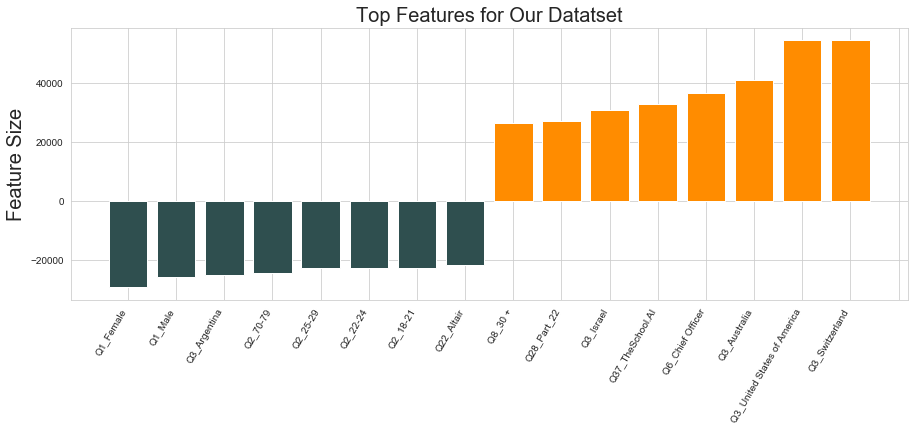

In [47]:
names = plot_coefficients(Important_feat["Attributes"],Important_feat["Actual Coefficient"])

The yearly compensation has been observed to have a strong corrleation with these features:
1. Positive 

  -locations : Israel, Australia, Switzerland, USA
    
  -30+ years of experience
  
  -online teaching platform : TheSchool.AI
  
  -job title : chief officer
  
2. Negative 

   -being female
   
   -being male
   
   -age 18-29
   
   -age 70-79
   
   - location Argetina
   
   - using thedata visualization tool Altair
   

# 3. Feature Selection

Feature selection or data dimension reduction is the process of identifying the few most important parameters which help in predicting the outcome. Unimportant features will result in unstability in estimating the coefficients in regression model as well as overfitting. 

Feature selection will reduce model computation time, decrease training speed and help in giving good predictive results.There are a lot of techniques used for feature selection, in this assignment we will use the following:

Randomized Lasso (Stability Selection): 

The high level idea is to apply a feature selection algorithm on different subsets of data and with different subsets of features. After repeating the process a number of times, the selection results can be aggregated, for example by checking how many times a feature ended up being selected as important when it was in an inspected feature subset. We can expect strong features to have scores close to 100%, since they are always selected when possible. Weaker, but still relevant features will also have non-zero scores, since they would be selected when stronger features are not present in the currently selected subset, while irreLevant features would have scores (close to) zero, since they would never be among selected features.



In [48]:
# creating a function for randomized lasso
def Randomized_Lasso(X,Y):
    # instantiating the object
    r_lasso = RandomizedLasso(alpha=0.05)
    # fitting to our dataset
    r_lasso.fit(X,Y)
    # getting the absolute scores
    r_lasso_AbsCo =np.abs(r_lasso.scores_)
    # converting to a series
    r_lasso_AbsCo_Ser = pd.Series(r_lasso_AbsCo.tolist(),name='RLASSO')
    # returning the series
    return r_lasso_AbsCo_Ser

In [49]:
# creating X and Y from our Dataset
X = df.drop(['Q9'], axis=1)
Y =df['Q9'].astype(float)
# getting the attribute list
Attributes = pd.Series(X.columns.tolist(), name = 'Attribute')
Rlasso1 = Randomized_Lasso(X,Y)

In [50]:
# store the results for feature selection purpose in data frame 
Results_Fea = pd.concat([Attributes,Rlasso1], axis=1)
Results_Fea.head()

,Attribute,RLASSO
0,Q34_Part_1,0.885
1,Q34_Part_2,1.000
2,Q34_Part_3,1.000
3,Q34_Part_4,0.680
4,Q34_Part_5,0.660


In [51]:
# getting the best 50-300 features in the dataset

# define the alogarithm models used above
model = "RLASSO"
# seting the number of best features in evey loop iteration
No_best_Feat = [i for i in range(50,300,10)]
# creating an empty dictionary to store the results of performance
score_accuracy = {}


# arranging the feature results obtained above and store them in score results
score_results = Results_Fea.sort_values(by="RLASSO", ascending=False)
accuracy = []
# run loop for each value in score results
for k in No_best_Feat: 
    # store the k best features in column in list form
    col = score_results["Attribute"][:k].tolist()
    # get the subset of the data
    X1 = X[col]
    # split the data set into train and test
    X_train, X_test, y_train, y_test = train_test_split( X1, Y, test_size=0.2, random_state=40)
    # fitting the model and getting the performance by using linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    rs2 = model.score(X_test, y_test)
    # append the score
    accuracy.append(rs2)
    # append the accuracy of each model into the accuracy dictionary    
    score_accuracy["RLASSO"] = accuracy

Text(0.5, 1.0, 'Performance of Model Under Different Feature Selection Techniques')

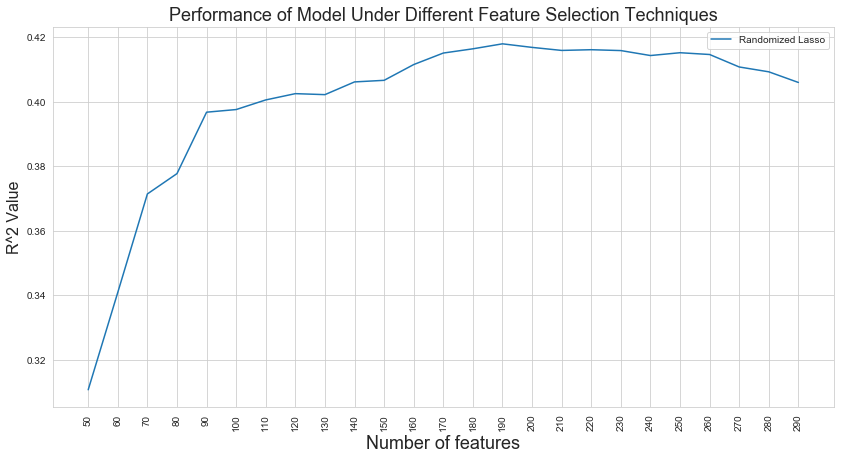

In [52]:
#plotting the scores and performance for each model under various feature size
plt.figure(figsize = (14,7))
plt.plot(No_best_Feat,score_accuracy["RLASSO"],  label = "Randomized Lasso")
plt.legend(loc='best')
plt.xticks(No_best_Feat)
plt.xticks(rotation=90)
plt.ylabel('R^2 Value',fontsize=16)
plt.xlabel('Number of features',fontsize=18)
plt.title('Performance of Model Under Different Feature Selection Techniques', fontsize=18)

In [53]:
print(max(score_accuracy["RLASSO"]))

0.41791827563915174


In [54]:
# finalizing the best features and store them in column to be used for model implementation
k = No_best_Feat[score_accuracy["RLASSO"].index(max(score_accuracy["RLASSO"]))]
#We take the subset
b = Results_Fea.sort_values(by="RLASSO", ascending=False)
col = b['Attribute'][:k].tolist()

In [55]:
print(len(col))

190


**Observation:**

From the above performance plot, we could observe the following:
1. Randomized lasso performance the best in terms of estimatinf R2 error with 50-300 selected feature. It reaches high value of R2 by only using 190 features. Therefore, we will reduce the dataframe to 190 features


# 4. Model Implementation

The following section will be devided into following sub-sectins: 
 1. Methodology of four chosen regression alogrithms. 
 2. Plot the R2 error score for each model and for overall 10 folds. 
 3. Bias and Variance Analysis for R2 values for choses models by using learning curve. 

## 4.1 Methodology of Four Chosen Regression Alogarithms


We present 4 different regression/prediction alogarithms with 10 fold cross validation and descirbe each technique and its pros and cons. 



**1. Lasso Regression Algorithms** 

lasso is regression model that uses L1 regularization to give an estimate by minimize the sum of square erro rwith respect to penalties.


Pros :
1. It  prevents overfitting in data as it shrinks coefficint to zero. 
2. It is easy to adjust the regulaization by adjusting the alpha coeffcient which will help in hypertunning for Bias-Variance trade.
3.  It punishes high values of the coefficient alpha but actually setting them to zero if they are not relevant. Therefore, you might end up with fewer features included in the model than you started with, which is a huge advantage.

Cons:  
1. It does not have a closed form solution and  computation time is expensive.



**2. Ridge Regression Algorithms** 

Ridge regression is an extension for linear regression. It’s basically a regularized linear regression model. It uses L2 regularization to give an estimate by minimize the sum of square error with respect to penalties or constrains ∑β^2<=c .
A super important fact we need to notice about ridge regression is that it enforces the β coefficients to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model. Therefore, it makes the model more stables and is a gentle trade-off between fitting the model, but not overfitting it

Advantages: 
1. It has closed form solution, thus the computational cost is not expensive. 
2. It reduces overfitting by regularized the parameters, thus reduce the variance in the model.

Disadvantages: 
1. It will include all features because it does not enforce the β coefficient to be zero. 



_____________________________________________

**3. Random Forest Alogrithms**
Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because it’s simplicity and the fact that it can be used for both classification and regression tasks.
Random Forest  creates a forest and makes it somehow random. The forest it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. Random Forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Pros: 
1. it’s default hyperparameters often produce a good prediction result. 
2. if there are enough trees in the forest, the classifier won’t overfit the model.
3. it is very easy to measure the relative importance of each feature on the prediction
4. can be used for regression or classification.


Cons: 
1. Random Forest is that a large number of trees can make the algorithm to slow and ineffective for real-time predictions.
2. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained.
3. A more accurate prediction requires more trees, which results in a slower model.
4. And of course Random Forest is a predictive modeling tool and not a descriptive tool.



**4. Decision Tree Alogrithms** 

Decision trees are similar to random forest tress with some differences. For example, if you want to predict whether a person will click on an online advertisement, you could collect the ad’s the person clicked in the past and some features that describe his decision. If you put the features and labels into a decision tree, it will generate some rules. Then you can predict whether the advertisement will be clicked or not. In comparison, the Random Forest algorithm randomly selects observations and features to build several decision trees and then averages the results.Another difference is that deep decision trees might suffer from overfitting. 


Pros: 
1. Interpretability :Decision trees are "white boxes" in the sense that the acquired knowledge can be expressed in a readable form.
2. can be used for Regression/Classfication
3. Can handle missing data.
4. Uses only the most important features. 
5. Can be used on very large or small data.

Cons: 
1. Can overfit or underfit the model.
2. Does not model relationship between features. 
3. Exponential computation cist growth while problem is getting bigger.


In [56]:
# now that we selected the 20 features above and stored in col, we will creating the X and y from new Dataset features
X = df[col]
Y =df["Q9"].astype(float)
#Splitting the Data using train_test_split in a 90-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 5)

In [57]:
# create a data frame named result DataFrame for storing the result of R2 and RMSE. Both wil be kept for training and cross validation
resultDF = pd.DataFrame(columns= ["Lasso Test R2", "Lasso Train R2","Lasso Test RMSE", "Lasso Train RMSE","Ridge Test R2", "Ridge Train R2","Ridge Test RMSE", "Ridge Train RMSE",
                                 "Random Forest Test R2", "Random Forest Train R2","Random Forest Test RMSE","Random Forest Train RMSE","Decision Tree Test R2","Decision Tree Train R2","Decision Tree Test RMSE","Decision Tree Train RMSE"], 
                        index = ['Mean', 'std_dev', 'Fold 1', 'Fold 2','Fold 3', 'Fold 4', 'Fold 5', 'Fold 6','Fold 7', 'Fold 8', 'Fold 9','Fold 10'])


In [58]:
# create a dictionary that contains the instances models
Models = {"Lasso":Lasso(alpha=0.3),"Ridge":Ridge(alpha=0.3),'Random Forest':RandomForestRegressor(max_depth=10, random_state=0),
          'Decision Tree':DecisionTreeRegressor(max_depth=10 , random_state =0)}

In [59]:
# create a dict to match the error name with its key. 
error_dic = {'test_r2':' Test R2', 'train_r2': ' Train R2','test_neg_mean_squared_error': ' Test RMSE', 'train_neg_mean_squared_error': ' Train RMSE'  }

In [60]:
# run a loop for every model
for name, m in Models.items():
    # we will cross validating using the training dataset
    # we defined scoring metric to return both Rsquare and negative mean squared error
    scores = cross_validate(m, X_train, y_train, cv=10,scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
    #getting the required errors
    for j in error_dic.keys():
        cur_scores = scores[j]
        # change the Mean Square Error to Root Mean Square Error
        if j =='test_neg_mean_squared_error' or j== 'train_neg_mean_squared_error':
            cur_scores = cur_scores*-1
            cur_scores = np.sqrt(cur_scores)
        cur_name = name+ error_dic[j] 
        # calculating mean and standard deviation
        resultDF[cur_name]['Mean'] = cur_scores.mean()
        resultDF[cur_name]['std_dev'] = cur_scores.std()
        # saving the values ino the Results Dataframe
        k =0
        for i in cur_scores:
            k=k+1
            row = 'Fold '+ str(k)
            resultDF[cur_name][row] = i

In [61]:
# Display the results
resultDF

,Lasso Test R2,Lasso Train R2,Lasso Test RMSE,Lasso Train RMSE,Ridge Test R2,Ridge Train R2,Ridge Test RMSE,Ridge Train RMSE,Random Forest Test R2,Random Forest Train R2,Random Forest Test RMSE,Random Forest Train RMSE,Decision Tree Test R2,Decision Tree Train R2,Decision Tree Test RMSE,Decision Tree Train RMSE
Mean,0.45048,0.481444,47196.3,45936,0.450671,0.481439,47188.4,45936.3,0.346136,0.615636,51480.3,39545.6,0.111772,0.587189,59891.2,40979.9
std_dev,0.0722323,0.0095352,5352.37,663.94,0.0722229,0.0095352,5355.5,663.951,0.0504149,0.0116284,4373.85,759.694,0.107332,0.0147853,5216.28,819.5
Fold 1,0.518315,0.473535,41780.3,46567.3,0.51829,0.47353,41781.4,46567.6,0.33076,0.617067,49247.1,39715.3,-0.0723309,0.583162,62338.2,41436.2
Fold 2,0.441692,0.481901,49494.3,45712.8,0.441746,0.481896,49491.9,45713.1,0.331469,0.606992,54160.1,39813.7,0.19195,0.58564,59543.9,40880.9
Fold 3,0.450938,0.480958,45463.1,46149.9,0.450855,0.480953,45466.6,46150.1,0.34164,0.621374,49782.9,39416.3,0.184999,0.595244,55389.6,40753.7
Fold 4,0.263206,0.507767,61294.2,44122.7,0.263246,0.507762,61292.6,44122.9,0.255315,0.643112,61621.6,37570.1,0.0436775,0.603359,69831.1,39607.3
Fold 5,0.385757,0.486977,48341.9,45855,0.386421,0.48697,48315.7,45855.4,0.318674,0.626433,50913.2,39129.4,-0.00217747,0.599005,61748.4,40540.4
Fold 6,0.500277,0.47569,42221.7,46494.6,0.500832,0.475682,42198.2,46494.9,0.40206,0.600422,46184.9,40589.1,0.321703,0.563695,49190.5,42413.4
Fold 7,0.48298,0.476501,47443.6,45975.1,0.482983,0.476496,47443.5,45975.4,0.298328,0.61392,55270.3,39482.4,0.153412,0.59669,60710,40353.8
Fold 8,0.469472,0.478991,43422.9,46362.7,0.470097,0.478984,43397.3,46363,0.351802,0.61081,47997.5,40070.7,0.0538848,0.606958,57987.8,40268.5


## 4.2 Plots of R2 Error Score for Each Model with Folds

1. Mean R2 values for Training and Validation Data Plot.
2. Standard Deviation R2 values for Training and Validation Data Plot. 
3. R2 Value for 10 Different Folds for Training and Validation for all Models Plot.

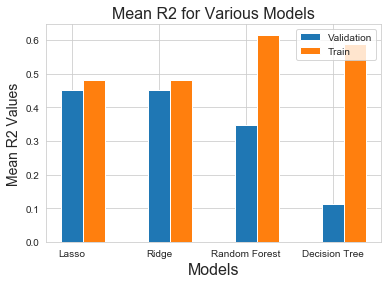

In [62]:
axp = np.arange(4)
# creating lists of mean R2 during trainig and validation respectively
R2_Tests = [resultDF['Lasso Test R2'][0] , resultDF['Ridge Test R2'][0], resultDF['Random Forest Test R2'][0], resultDF['Decision Tree Test R2'][0]]
R2_Train = [resultDF['Lasso Train R2'][0], resultDF['Ridge Train R2'][0], resultDF['Random Forest Train R2'][0] ,resultDF['Decision Tree Train R2'][0]]

# Plotting using a bar chart
plt.bar(axp + 0.00, R2_Tests, width = 0.25)
plt.bar(axp + 0.25, R2_Train, width = 0.25)
plt.xticks(np.arange(4), ("Lasso","Ridge", "Random Forest", "Decision Tree"))
plt.ylabel('Mean R2 Values',fontsize=14)
plt.xlabel('Models',fontsize=16)
plt.title('Mean R2 for Various Models', fontsize=16)
plt.legend(["Validation", "Train"],loc=1)
plt.show()


**Observation:**

1. There is a big difference in R2 values between train and validation data for Random Forest and Decision Tree. This implies that both models overfit. And as expected, Random Forest performs better than Decision Tree. 

2. From Lasso and Ridge bar plots above, it can be seen that there is only slightly small difference in R2 between train and validation data. This implies that both models do not experinece overfitting of data and perform less bettwe than the random forest and decision trees in terms of R2 values for training. This typically show the tradeoff between bias and variance. 

#### 2. Standard Deviation R2 for Training and Validation Data Plot

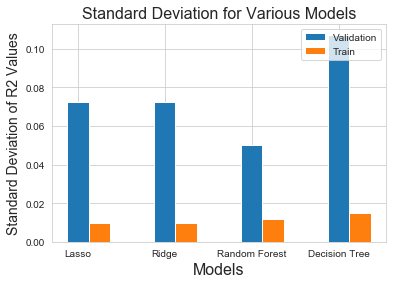

In [63]:
axp = np.arange(4)
#Creating lists of mean R2 during trainig and validation respectively
R2_Tests = [resultDF['Lasso Test R2'][1] , resultDF['Ridge Test R2'][1], resultDF['Random Forest Test R2'][1], resultDF['Decision Tree Test R2'][1]]
R2_Train = [resultDF['Lasso Train R2'][1], resultDF['Ridge Train R2'][1], resultDF['Random Forest Train R2'][1] ,resultDF['Decision Tree Train R2'][1]]

# Plotting using a bar chart
plt.bar(axp + 0.00, R2_Tests, width = 0.25)
plt.bar(axp + 0.25, R2_Train, width = 0.25)
plt.xticks(np.arange(4), ("Lasso","Ridge", "Random Forest", "Decision Tree"))
plt.ylabel('Standard Deviation of R2 Values',fontsize=14)
plt.xlabel('Models',fontsize=16)
plt.title('Standard Deviation for Various Models', fontsize=16)
plt.legend(['Validation', 'Train'],loc=1)
plt.show()

**Observation:**

1. It can be seen that standard deviation R2 values for train and validation in Lasso, Ridge and Random Forest have alomst closed comparable values. However, Decision Tree Standard Deviation R2 values are relatively higheer than other models. 
2. Both Lasso and Ridge Standard Deviation R2 values during training and validation are almost same. 

#### 3. R2 Value for 10 Different Folds for Training and Validation for all Models Plot

Text(0.5, 1.0, 'Training performance under different folds')

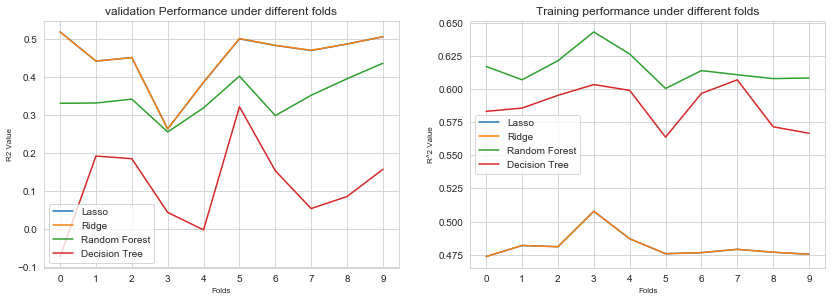

In [64]:
axp = np.arange(10)

#Creating Two Subplots
fig = plt.figure(figsize=(14,10))

#Plotting the Performance of Various Models during Cross Validation
plt.subplot(2, 2, 1)
plt.plot(axp,resultDF['Lasso Test R2'][2:], label = 'Lasso')
plt.plot(axp,resultDF['Ridge Test R2'][2:], label = 'Ridge')
plt.plot(axp,resultDF['Random Forest Test R2'][2:], label = 'Random Forest')
plt.plot(axp,resultDF['Decision Tree Test R2'][2:], label = 'Decision Tree')


plt.legend(loc='best')
plt.xticks(axp)
plt.ylabel('R2 Value',fontsize=8)
plt.xlabel('Folds',fontsize=8)
plt.title('validation Performance under different folds', fontsize=12)

#Plotting the Performance of Various Models during Training
plt.subplot(2, 2, 2)
plt.plot(axp,resultDF['Lasso Train R2'][2:],label = 'Lasso')
plt.plot(axp,resultDF['Ridge Train R2'][2:], label = 'Ridge')
plt.plot(axp,resultDF['Random Forest Train R2'][2:], label = 'Random Forest')
plt.plot(axp,resultDF['Decision Tree Train R2'][2:], label = 'Decision Tree')


plt.legend(loc='best')
plt.xticks(axp)
plt.ylabel('R2 Value',fontsize=8)
plt.xlabel('Folds',fontsize=8)
plt.title('Training performance under different folds', fontsize=12)

**Observation:** 

1. Lasso and Ridge R2 have same behavior over all 10 folds, the two curves overlapping each other. 
2. Durining training, there is not much flactuation in R2 values between 10 folds for Lasso, Ridge and Random Forest, while the decision tree plot has some flactuation in R2 values within 10 folds. While durining validation, there is a clearly flactuation on R2 values between all models within 10 folds. 

#### Which Model Performed the Best? 

Based on bias and variance analysis from the plot above, we can conclude the follwoing :

1. Both Lasso and Ridge models have large bias error  and low variance given both training and validation converge. Therefore, both models tends to underfit the data. 


2. Both Random Forest and Decision Tree models have low bias error but high variance as both training and validation diverge. Therefore, both models tend to overfit the data 


# 5. Hyperparameter Tunning 

Hyper Tuning is the process of tuning constrains of a certain regression model to improve its performance. In other words, adjust the settings paramters of an alogarithm for prupose of optimization or prediction improvement. In this section we will do the following:

1. Hypertune the parameters of the 4 models used above


## 5.1 Lasso Model 

We decide that Lasso is the optimal model to hypertune its parameters.
Lasso Tunning Paramters are:

1. alpha: It refers to the Constant that multiplies the L1 term. Therefore, higher the alpha more the regularization would happen.
2. fit_intercept:If set to False, no intercept will be used in calculations.
3. positive: If set to true it would force the coefficients to be positive.
4. selction: If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default.

In [65]:
#General scoring function for root square mean error 
# define the rmse function
def rmse(y, y_pred):
    return np.sqrt(np.mean((y_pred - y)**2))

# Defining the scoring metric to have both r2 and RMSE
scoring = {'R2':'r2', 'RMSE':make_scorer(rmse, greater_is_better=False)}

In [66]:
# Create the parameter grid based on the results of random search 
param_grid = {
    "alpha": [i for i in np.arange(0.2,3,0.1)],
    "fit_intercept": [True, False],
    "positive": [True, False],
    "selection": ["cyclic","random"]
}

lso_grid = Lasso()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lso_grid, param_grid = param_grid, scoring=scoring, refit ='R2',
                          cv = 10, verbose=10)

# Fit the grid search to the data
grid_search=grid_search.fit(X_train,y_train)
lso_grid=grid_search.best_estimator_

Fitting 10 folds for each of 224 candidates, totalling 2240 fits
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.4794464203242823, RMSE=-43433.29860500321, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.4113932463080786, RMSE=-50819.57534895573, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.39479823640688627, RMSE=-47730.839095171934, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.23703018478209326, RMSE=-62373.522001261896, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.3420956151120067, RMSE=-50030.47726927205, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s


[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.4757200391908485, RMSE=-43246.66246679941, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.44504353858207313, RMSE=-49153.43902641728, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.4161523969990403, RMSE=-45552.743235102, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s


[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.43455621625075724, RMSE=-50631.92865264006, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=cyclic ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=cyclic, R2=0.4571584615205536, RMSE=-46370.67409684481, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=random ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=random, R2=0.47944642032909557, RMSE=-43433.29860480242, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=random ..


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=random, R2=0.4113932143949739, RMSE=-50819.57672662461, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=random ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=random, R2=0.39479828869992173, RMSE=-47730.837033057585, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=random ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=random, R2=0.23703019683651005, RMSE=-62373.521508531776, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=random ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=random, R2=0.3420955664151054, RMSE=-50030.4791208551, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, selection=random ..
[CV]  alpha=0.2, fit_intercept=True, positive=True, selection=random, R2=0.4757200278696091, RMSE=-43246.66293373107, total=   0.0s
[CV] alpha=0.2, fit_intercept=True, positive=True, se

[CV]  alpha=0.2, fit_intercept=False, positive=True, selection=random, R2=0.41183640362933394, RMSE=-50800.44092064938, total=   0.0s
[CV] alpha=0.2, fit_intercept=False, positive=True, selection=random .
[CV]  alpha=0.2, fit_intercept=False, positive=True, selection=random, R2=0.39521959678558904, RMSE=-47714.2203512284, total=   0.0s
[CV] alpha=0.2, fit_intercept=False, positive=True, selection=random .
[CV]  alpha=0.2, fit_intercept=False, positive=True, selection=random, R2=0.2365363089564534, RMSE=-62393.70614920395, total=   0.0s
[CV] alpha=0.2, fit_intercept=False, positive=True, selection=random .
[CV]  alpha=0.2, fit_intercept=False, positive=True, selection=random, R2=0.34144851066209425, RMSE=-50055.07581904331, total=   0.0s
[CV] alpha=0.2, fit_intercept=False, positive=True, selection=random .
[CV]  alpha=0.2, fit_intercept=False, positive=True, selection=random, R2=0.4760873258674698, RMSE=-43231.51149119174, total=   0.0s
[CV] alpha=0.2, fit_intercept=False, positive=Tru

[CV]  alpha=0.30000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.41138110403044104, RMSE=-50820.09952083036, total=   0.0s
[CV] alpha=0.30000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.30000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.39479983184042555, RMSE=-47730.77618108587, total=   0.0s
[CV] alpha=0.30000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.30000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.23703926062121894, RMSE=-62373.15102083545, total=   0.0s
[CV] alpha=0.30000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.30000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.3421178609917811, RMSE=-50029.63141581947, total=   0.0s
[CV] alpha=0.30000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.30000000000000004, fit_intercept=True, positive=Tru

[CV]  alpha=0.30000000000000004, fit_intercept=False, positive=True, selection=cyclic, R2=0.44471827920417084, RMSE=-49167.84130498852, total=   0.0s
[CV] alpha=0.30000000000000004, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.30000000000000004, fit_intercept=False, positive=True, selection=cyclic, R2=0.4157229113868385, RMSE=-45569.494739357215, total=   0.0s
[CV] alpha=0.30000000000000004, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.30000000000000004, fit_intercept=False, positive=True, selection=cyclic, R2=0.4343017932496531, RMSE=-50643.318360044075, total=   0.1s
[CV] alpha=0.30000000000000004, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.30000000000000004, fit_intercept=False, positive=True, selection=cyclic, R2=0.45703413281458793, RMSE=-46375.98400353817, total=   0.0s
[CV] alpha=0.30000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=0.30000000000000004, fit_intercept=False, po

[CV]  alpha=0.4000000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.23704823041965506, RMSE=-62372.78437271847, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.4000000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.34214016716579054, RMSE=-50028.78325544437, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.4000000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.47573398835749037, RMSE=-43246.08714544516, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.4000000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.444999306363726, RMSE=-49155.397848845714, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.4000000000000001, fit_intercept=True, positive=True, select

[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.4793271086349584, RMSE=-43438.27580958836, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.4118175066785784, RMSE=-50801.25699097896, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.39522898508639503, RMSE=-47713.850004248336, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.23654482683627487, RMSE=-62393.35808839956, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=Tru

[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.46003425283376276, RMSE=-48485.01765858724, total=   0.1s
[CV] alpha=0.4000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.4439985848195308, RMSE=-44453.16970457128, total=   0.1s
[CV] alpha=0.4000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.46034889766327036, RMSE=-49463.66451943631, total=   0.0s
[CV] alpha=0.4000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.4000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.48766260146889795, RMSE=-45048.9738032398, total=   0.0s
[CV] alpha=0.5000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.5000000000000001, fit_intercept=True, positive

[CV]  alpha=0.5000000000000001, fit_intercept=True, positive=False, selection=random, R2=0.45091740818112447, RMSE=-45464.01792419997, total=   0.0s
[CV] alpha=0.5000000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=0.5000000000000001, fit_intercept=True, positive=False, selection=random, R2=0.2632062821696306, RMSE=-61294.22335187826, total=   0.0s
[CV] alpha=0.5000000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=0.5000000000000001, fit_intercept=True, positive=False, selection=random, R2=0.38582263231506886, RMSE=-48339.27803584684, total=   0.0s
[CV] alpha=0.5000000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=0.5000000000000001, fit_intercept=True, positive=False, selection=random, R2=0.5003421906325208, RMSE=-42218.93826535089, total=   0.0s
[CV] alpha=0.5000000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=0.5000000000000001, fit_intercept=True, positive=False

[CV]  alpha=0.5000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.46033542624006996, RMSE=-49464.281901478505, total=   0.5s
[CV] alpha=0.5000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=0.5000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.4876596370618086, RMSE=-45049.10413073936, total=   0.4s
[CV] alpha=0.5000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.5000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.49687191048822543, RMSE=-42700.14770986755, total=   0.1s
[CV] alpha=0.5000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.5000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.430227088496548, RMSE=-49999.92008934638, total=   0.1s
[CV] alpha=0.5000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.5000000000000001, fit_intercept=False, posit

[CV]  alpha=0.6000000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.3858540086457183, RMSE=-48338.04327157332, total=   0.0s
[CV] alpha=0.6000000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=0.6000000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.5003740374598646, RMSE=-42217.59278386593, total=   0.0s
[CV] alpha=0.6000000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=0.6000000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.4828902910229772, RMSE=-47447.769202303985, total=   0.0s
[CV] alpha=0.6000000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=0.6000000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.4695719547466862, RMSE=-43418.82078128716, total=   0.0s
[CV] alpha=0.6000000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=0.6000000000000001, fit_intercept=True, positive=False,

[CV]  alpha=0.6000000000000001, fit_intercept=False, positive=True, selection=random, R2=0.45701337040320855, RMSE=-46376.87067810789, total=   0.0s
[CV] alpha=0.6000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=0.6000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.4968624946423802, RMSE=-42700.54726629832, total=   0.5s
[CV] alpha=0.6000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=0.6000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.43022420170953335, RMSE=-50000.04675291207, total=   0.5s
[CV] alpha=0.6000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=0.6000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.4256782094983643, RMSE=-46497.18103466321, total=   0.5s
[CV] alpha=0.6000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=0.6000000000000001, fit_intercept=False, positi

[CV]  alpha=0.7000000000000002, fit_intercept=True, positive=True, selection=random, R2=0.4163155315047319, RMSE=-45546.378780251354, total=   0.0s
[CV] alpha=0.7000000000000002, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.7000000000000002, fit_intercept=True, positive=True, selection=random, R2=0.4346105175888605, RMSE=-50629.497422899236, total=   0.0s
[CV] alpha=0.7000000000000002, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.7000000000000002, fit_intercept=True, positive=True, selection=random, R2=0.4571228396729471, RMSE=-46372.19551872534, total=   0.0s
[CV] alpha=0.7000000000000002, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=0.7000000000000002, fit_intercept=True, positive=False, selection=cyclic, R2=0.51827752441226, RMSE=-41781.93507162711, total=   0.0s
[CV] alpha=0.7000000000000002, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=0.7000000000000002, fit_intercept=True, positive=False, selec

[CV]  alpha=0.7000000000000002, fit_intercept=False, positive=True, selection=random, R2=0.3415258380789802, RMSE=-50052.136987830265, total=   0.0s
[CV] alpha=0.7000000000000002, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=0.7000000000000002, fit_intercept=False, positive=True, selection=random, R2=0.4761225846958589, RMSE=-43230.05674675947, total=   0.0s
[CV] alpha=0.7000000000000002, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=0.7000000000000002, fit_intercept=False, positive=True, selection=random, R2=0.44462340263740585, RMSE=-49172.04158437646, total=   0.0s
[CV] alpha=0.7000000000000002, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=0.7000000000000002, fit_intercept=False, positive=True, selection=random, R2=0.41584581270922893, RMSE=-45564.70176884714, total=   0.0s
[CV] alpha=0.7000000000000002, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=0.7000000000000002, fit_intercept=False, positive=Tru

[CV]  alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=random, R2=0.47931528855185, RMSE=-43438.76886494486, total=   0.0s
[CV] alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=random, R2=0.4113199217844765, RMSE=-50822.74062448664, total=   0.0s
[CV] alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=random, R2=0.394807585184327, RMSE=-47730.47043570837, total=   0.0s
[CV] alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=random, R2=0.23708398970723232, RMSE=-62371.3226600929, total=   0.0s
[CV] alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=0.8000000000000003, fit_intercept=True, positive=True, selection=ra

[CV]  alpha=0.8000000000000003, fit_intercept=False, positive=True, selection=cyclic, R2=0.41587667966942554, RMSE=-45563.49792365843, total=   0.0s
[CV] alpha=0.8000000000000003, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.8000000000000003, fit_intercept=False, positive=True, selection=cyclic, R2=0.43434789768917803, RMSE=-50641.25460117409, total=   0.0s
[CV] alpha=0.8000000000000003, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.8000000000000003, fit_intercept=False, positive=True, selection=cyclic, R2=0.4569993395544656, RMSE=-46377.4698665765, total=   0.0s
[CV] alpha=0.8000000000000003, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=0.8000000000000003, fit_intercept=False, positive=True, selection=random, R2=0.47923585772439026, RMSE=-43442.082046318945, total=   0.0s
[CV] alpha=0.8000000000000003, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=0.8000000000000003, fit_intercept=False, positive=Tru

[CV] alpha=0.9000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.9000000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.2370929388163584, RMSE=-62370.95684694824, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.9000000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.3422511320035093, RMSE=-50024.56376243406, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.9000000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.47576825097021824, RMSE=-43244.67398102797, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=0.9000000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.44488826348697164, RMSE=-49160.3150353034, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=True, positive=True, selection

[CV]  alpha=0.9000000000000001, fit_intercept=True, positive=False, selection=random, R2=0.5055186013675402, RMSE=-44256.987867484175, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.9000000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.4792137034728472, RMSE=-43443.006088989525, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.9000000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.41176827852050335, RMSE=-50803.38286178667, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.9000000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.3952504806302438, RMSE=-47713.00204341403, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=0.9000000000000001, fit_intercept=False, positive=Tru

[CV]  alpha=0.9000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.3514390658244424, RMSE=-49673.944550918735, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.9000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.4924297211695937, RMSE=-42551.91006448339, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.9000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.459908130591302, RMSE=-48490.67976044029, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.9000000000000001, fit_intercept=False, positive=False, selection=random, R2=0.444225159554548, RMSE=-44444.11128207375, total=   0.0s
[CV] alpha=0.9000000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=0.9000000000000001, fit_intercept=False, positive

[CV]  alpha=1.0000000000000002, fit_intercept=True, positive=False, selection=random, R2=0.5182483757564279, RMSE=-41783.19914885451, total=   0.1s
[CV] alpha=1.0000000000000002, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.0000000000000002, fit_intercept=True, positive=False, selection=random, R2=0.44166303786968875, RMSE=-49495.60087337079, total=   0.0s
[CV] alpha=1.0000000000000002, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.0000000000000002, fit_intercept=True, positive=False, selection=random, R2=0.4508629559371855, RMSE=-45466.27219018649, total=   0.0s
[CV] alpha=1.0000000000000002, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.0000000000000002, fit_intercept=True, positive=False, selection=random, R2=0.2632048670395897, RMSE=-61294.282214523984, total=   0.0s
[CV] alpha=1.0000000000000002, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.0000000000000002, fit_intercept=True, positive=False

[CV]  alpha=1.0000000000000002, fit_intercept=False, positive=False, selection=cyclic, R2=0.45988275042410043, RMSE=-48491.819091701946, total=   0.6s
[CV] alpha=1.0000000000000002, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.0000000000000002, fit_intercept=False, positive=False, selection=cyclic, R2=0.44426897406652577, RMSE=-44442.35937169141, total=   0.5s
[CV] alpha=1.0000000000000002, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.0000000000000002, fit_intercept=False, positive=False, selection=cyclic, R2=0.46026629794458285, RMSE=-49467.449861881425, total=   0.5s
[CV] alpha=1.0000000000000002, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.0000000000000002, fit_intercept=False, positive=False, selection=cyclic, R2=0.48764147621081066, RMSE=-45049.902548038684, total=   0.5s
[CV] alpha=1.0000000000000002, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.0000000000000002, fit_intercept=False, 

[CV]  alpha=1.1000000000000003, fit_intercept=True, positive=False, selection=cyclic, R2=0.2632041547308458, RMSE=-61294.31184314168, total=   0.0s
[CV] alpha=1.1000000000000003, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.1000000000000003, fit_intercept=True, positive=False, selection=cyclic, R2=0.38601343071907457, RMSE=-48331.76898878807, total=   0.0s
[CV] alpha=1.1000000000000003, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.1000000000000003, fit_intercept=True, positive=False, selection=cyclic, R2=0.5005329629653092, RMSE=-42210.8777746286, total=   0.1s
[CV] alpha=1.1000000000000003, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.1000000000000003, fit_intercept=True, positive=False, selection=cyclic, R2=0.48273942726077257, RMSE=-47454.69000347519, total=   0.0s
[CV] alpha=1.1000000000000003, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.1000000000000003, fit_intercept=True, positive=False,

[CV]  alpha=1.1000000000000003, fit_intercept=False, positive=False, selection=cyclic, R2=0.49681636462280376, RMSE=-42702.50471521914, total=   0.4s
[CV] alpha=1.1000000000000003, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.1000000000000003, fit_intercept=False, positive=False, selection=cyclic, R2=0.43020716939703063, RMSE=-50000.794073226316, total=   0.4s
[CV] alpha=1.1000000000000003, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.1000000000000003, fit_intercept=False, positive=False, selection=cyclic, R2=0.4256528482220162, RMSE=-46498.20764975871, total=   0.4s
[CV] alpha=1.1000000000000003, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.1000000000000003, fit_intercept=False, positive=False, selection=cyclic, R2=0.24618149590338845, RMSE=-61998.32928346333, total=   0.4s
[CV] alpha=1.1000000000000003, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.1000000000000003, fit_intercept=False, pos

[CV]  alpha=1.2000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.41647751217060247, RMSE=-45540.05846072829, total=   0.0s
[CV] alpha=1.2000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.2000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.43466371805907844, RMSE=-50627.11536900687, total=   0.0s
[CV] alpha=1.2000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.2000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.45708604729803815, RMSE=-46373.76688184482, total=   0.0s
[CV] alpha=1.2000000000000004, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.2000000000000004, fit_intercept=True, positive=False, selection=cyclic, R2=0.5182271322364509, RMSE=-41784.120383362206, total=   0.0s
[CV] alpha=1.2000000000000004, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.2000000000000004, fit_intercept=True, positive=False, s

[CV]  alpha=1.2000000000000004, fit_intercept=False, positive=True, selection=random, R2=0.23655921934730284, RMSE=-62392.76997179611, total=   0.0s
[CV] alpha=1.2000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.2000000000000004, fit_intercept=False, positive=True, selection=random, R2=0.3416016225541906, RMSE=-50049.25662873606, total=   0.0s
[CV] alpha=1.2000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.2000000000000004, fit_intercept=False, positive=True, selection=random, R2=0.4761625647523893, RMSE=-43228.40714988991, total=   0.0s
[CV] alpha=1.2000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.2000000000000004, fit_intercept=False, positive=True, selection=random, R2=0.444506154496784, RMSE=-49177.2317798397, total=   0.0s
[CV] alpha=1.2000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.2000000000000004, fit_intercept=False, positive=True, s

[CV]  alpha=1.3000000000000003, fit_intercept=True, positive=True, selection=random, R2=0.47920431776940786, RMSE=-43443.397556024385, total=   0.0s
[CV] alpha=1.3000000000000003, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.3000000000000003, fit_intercept=True, positive=True, selection=random, R2=0.4112580629506347, RMSE=-50825.410795432916, total=   0.0s
[CV] alpha=1.3000000000000003, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.3000000000000003, fit_intercept=True, positive=True, selection=random, R2=0.39481495979743375, RMSE=-47730.17962338445, total=   0.0s
[CV] alpha=1.3000000000000003, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.3000000000000003, fit_intercept=True, positive=True, selection=random, R2=0.23712771897783214, RMSE=-62369.53511631743, total=   0.0s
[CV] alpha=1.3000000000000003, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.3000000000000003, fit_intercept=True, positive=True, sele

[CV]  alpha=1.3000000000000003, fit_intercept=False, positive=True, selection=cyclic, R2=0.444483738931871, RMSE=-49178.22398193142, total=   0.0s
[CV] alpha=1.3000000000000003, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.3000000000000003, fit_intercept=False, positive=True, selection=cyclic, R2=0.41602909595839666, RMSE=-45557.5530554249, total=   0.0s
[CV] alpha=1.3000000000000003, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.3000000000000003, fit_intercept=False, positive=True, selection=cyclic, R2=0.4343935730119498, RMSE=-50639.209967789335, total=   0.0s
[CV] alpha=1.3000000000000003, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.3000000000000003, fit_intercept=False, positive=True, selection=cyclic, R2=0.4569633202116683, RMSE=-46379.00803992077, total=   0.0s
[CV] alpha=1.3000000000000003, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.3000000000000003, fit_intercept=False, positive=True, 

[CV]  alpha=1.4000000000000004, fit_intercept=True, positive=True, selection=cyclic, R2=0.3948163607390228, RMSE=-47730.12437810576, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.4000000000000004, fit_intercept=True, positive=True, selection=cyclic, R2=0.23713583684915007, RMSE=-62369.2032722986, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.4000000000000004, fit_intercept=True, positive=True, selection=cyclic, R2=0.3423608017428519, RMSE=-50020.39316645198, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.4000000000000004, fit_intercept=True, positive=True, selection=cyclic, R2=0.4758014252266094, RMSE=-43243.30566195754, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.4000000000000004, fit_intercept=True, positive=True, selection

[CV]  alpha=1.4000000000000004, fit_intercept=True, positive=False, selection=random, R2=0.4863475654699203, RMSE=-48257.4566394986, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.4000000000000004, fit_intercept=True, positive=False, selection=random, R2=0.5054796801958604, RMSE=-44258.72959117013, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.4000000000000004, fit_intercept=False, positive=True, selection=cyclic, R2=0.479104494284457, RMSE=-43447.56086200236, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.4000000000000004, fit_intercept=False, positive=True, selection=cyclic, R2=0.4117181638907397, RMSE=-50805.54692265376, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.4000000000000004, fit_intercept=False, positive=True, se

[CV]  alpha=1.4000000000000004, fit_intercept=False, positive=False, selection=random, R2=0.24619659591590526, RMSE=-61997.70832481649, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.4000000000000004, fit_intercept=False, positive=False, selection=random, R2=0.3515990717421319, RMSE=-49667.816664591104, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.4000000000000004, fit_intercept=False, positive=False, selection=random, R2=0.49253996042957804, RMSE=-42547.28888589636, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.4000000000000004, fit_intercept=False, positive=False, selection=random, R2=0.4597812849410653, RMSE=-48496.373672022986, total=   0.0s
[CV] alpha=1.4000000000000004, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.4000000000000004, fit_intercept=False, pos

[CV]  alpha=1.5000000000000004, fit_intercept=True, positive=False, selection=random, R2=0.518196423675551, RMSE=-41785.45203759701, total=   0.0s
[CV] alpha=1.5000000000000004, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.5000000000000004, fit_intercept=True, positive=False, selection=random, R2=0.4416440124788441, RMSE=-49496.44415009594, total=   0.0s
[CV] alpha=1.5000000000000004, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.5000000000000004, fit_intercept=True, positive=False, selection=random, R2=0.4508050002205367, RMSE=-45468.67137350078, total=   0.0s
[CV] alpha=1.5000000000000004, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.5000000000000004, fit_intercept=True, positive=False, selection=random, R2=0.2632014693222896, RMSE=-61294.423543092584, total=   0.0s
[CV] alpha=1.5000000000000004, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.5000000000000004, fit_intercept=True, positive=False, 

[CV]  alpha=1.5000000000000004, fit_intercept=False, positive=False, selection=cyclic, R2=0.4597549237383719, RMSE=-48497.556903096905, total=   0.4s
[CV] alpha=1.5000000000000004, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.5000000000000004, fit_intercept=False, positive=False, selection=cyclic, R2=0.444491887685325, RMSE=-44433.44516648988, total=   0.4s
[CV] alpha=1.5000000000000004, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.5000000000000004, fit_intercept=False, positive=False, selection=cyclic, R2=0.46019375156208564, RMSE=-49470.77424568698, total=   0.4s
[CV] alpha=1.5000000000000004, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.5000000000000004, fit_intercept=False, positive=False, selection=cyclic, R2=0.4876215558111653, RMSE=-45050.77830524622, total=   0.4s
[CV] alpha=1.5000000000000004, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.5000000000000004, fit_intercept=False, positi

[CV]  alpha=1.6000000000000003, fit_intercept=True, positive=False, selection=cyclic, R2=0.45079296311734174, RMSE=-45469.169655614394, total=   0.0s
[CV] alpha=1.6000000000000003, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.6000000000000003, fit_intercept=True, positive=False, selection=cyclic, R2=0.26320105029766205, RMSE=-61294.44097246322, total=   0.0s
[CV] alpha=1.6000000000000003, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.6000000000000003, fit_intercept=True, positive=False, selection=cyclic, R2=0.38617001212180135, RMSE=-48325.6057116732, total=   0.0s
[CV] alpha=1.6000000000000003, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.6000000000000003, fit_intercept=True, positive=False, selection=cyclic, R2=0.5006884914853441, RMSE=-42204.30526232125, total=   0.0s
[CV] alpha=1.6000000000000003, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=1.6000000000000003, fit_intercept=True, positive=Fals

[CV]  alpha=1.6000000000000003, fit_intercept=False, positive=True, selection=random, R2=0.43442186695270235, RMSE=-50637.94336202153, total=   0.0s
[CV] alpha=1.6000000000000003, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.6000000000000003, fit_intercept=False, positive=True, selection=random, R2=0.45693684098300225, RMSE=-46380.13877881423, total=   0.0s
[CV] alpha=1.6000000000000003, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.6000000000000003, fit_intercept=False, positive=False, selection=cyclic, R2=0.49677004029883887, RMSE=-42704.47031882476, total=   0.5s
[CV] alpha=1.6000000000000003, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.6000000000000003, fit_intercept=False, positive=False, selection=cyclic, R2=0.4301880924866054, RMSE=-50001.63109032683, total=   0.4s
[CV] alpha=1.6000000000000003, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=1.6000000000000003, fit_intercept=False, positiv

[CV]  alpha=1.7000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.34242621130063555, RMSE=-50017.905561421394, total=   0.0s
[CV] alpha=1.7000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.7000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.47582060719340813, RMSE=-43242.51445488263, total=   0.0s
[CV] alpha=1.7000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.7000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.44470866942884124, RMSE=-49168.26675557194, total=   0.0s
[CV] alpha=1.7000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.7000000000000004, fit_intercept=True, positive=True, selection=random, R2=0.41663811999997513, RMSE=-45533.79084170721, total=   0.0s
[CV] alpha=1.7000000000000004, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=1.7000000000000004, fit_intercept=True, positive=True, sele

[CV]  alpha=1.7000000000000004, fit_intercept=False, positive=True, selection=random, R2=0.47903834385339206, RMSE=-43450.3195569869, total=   0.0s
[CV] alpha=1.7000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.7000000000000004, fit_intercept=False, positive=True, selection=random, R2=0.41168772368168416, RMSE=-50806.86135339855, total=   0.0s
[CV] alpha=1.7000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.7000000000000004, fit_intercept=False, positive=True, selection=random, R2=0.3952787916377247, RMSE=-47711.88520171001, total=   0.0s
[CV] alpha=1.7000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.7000000000000004, fit_intercept=False, positive=True, selection=random, R2=0.23656998215925162, RMSE=-62392.33017080961, total=   0.0s
[CV] alpha=1.7000000000000004, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=1.7000000000000004, fit_intercept=False, positive=True

[CV]  alpha=1.8000000000000005, fit_intercept=True, positive=True, selection=cyclic, R2=0.4758274067969115, RMSE=-43242.23398515193, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.8000000000000005, fit_intercept=True, positive=True, selection=cyclic, R2=0.4446862557625496, RMSE=-49169.25905451678, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.8000000000000005, fit_intercept=True, positive=True, selection=cyclic, R2=0.4166701730965944, RMSE=-45532.53988660017, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.8000000000000005, fit_intercept=True, positive=True, selection=cyclic, R2=0.43472585196907365, RMSE=-50624.33317797591, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.8000000000000005, fit_intercept=True, positive=True, selectio

[CV]  alpha=1.8000000000000005, fit_intercept=False, positive=True, selection=cyclic, R2=0.39528302696230966, RMSE=-47711.718120027224, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.8000000000000005, fit_intercept=False, positive=True, selection=cyclic, R2=0.2365756728162005, RMSE=-62392.09763213506, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.8000000000000005, fit_intercept=False, positive=True, selection=cyclic, R2=0.341690622686569, RMSE=-50045.873767264464, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.8000000000000005, fit_intercept=False, positive=True, selection=cyclic, R2=0.4762101495709249, RMSE=-43226.443694733985, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=1.8000000000000005, fit_intercept=False, positive=Tru

[CV]  alpha=1.8000000000000005, fit_intercept=False, positive=False, selection=random, R2=0.444627538683799, RMSE=-44428.0196748742, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.8000000000000005, fit_intercept=False, positive=False, selection=random, R2=0.46014956262023354, RMSE=-49472.79906147644, total=   0.0s
[CV] alpha=1.8000000000000005, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.8000000000000005, fit_intercept=False, positive=False, selection=random, R2=0.4876075710636718, RMSE=-45051.39310419735, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.9000000000000006, fit_intercept=True, positive=True, selection=cyclic, R2=0.47906886643948676, RMSE=-43449.04668447331, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=1.9000000000000006, fit_intercept=True, positive=True,

[CV]  alpha=1.9000000000000006, fit_intercept=True, positive=False, selection=random, R2=0.38626017268998747, RMSE=-48322.056500849125, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.9000000000000006, fit_intercept=True, positive=False, selection=random, R2=0.5007787608747504, RMSE=-42200.4900798087, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.9000000000000006, fit_intercept=True, positive=False, selection=random, R2=0.4824950858256133, RMSE=-47465.8969064152, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.9000000000000006, fit_intercept=True, positive=False, selection=random, R2=0.4700004388246821, RMSE=-43401.280200386784, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=1.9000000000000006, fit_intercept=True, positive=False,

[CV]  alpha=1.9000000000000006, fit_intercept=False, positive=False, selection=random, R2=0.4301738304954418, RMSE=-50002.256839235524, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.9000000000000006, fit_intercept=False, positive=False, selection=random, R2=0.42561243802623916, RMSE=-46499.84339272261, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.9000000000000006, fit_intercept=False, positive=False, selection=random, R2=0.24620821796456205, RMSE=-61997.2303864335, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.9000000000000006, fit_intercept=False, positive=False, selection=random, R2=0.35175236445659985, RMSE=-49661.94517045709, total=   0.0s
[CV] alpha=1.9000000000000006, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=1.9000000000000006, fit_intercept=False, posi

[CV]  alpha=2.000000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.48246421634066505, RMSE=-47467.31257020881, total=   0.0s
[CV] alpha=2.000000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.000000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.4700331163681817, RMSE=-43399.94220957787, total=   0.0s
[CV] alpha=2.000000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.000000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.48619874023841014, RMSE=-48264.44717096272, total=   0.0s
[CV] alpha=2.000000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.000000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.505432390840402, RMSE=-44260.845699122096, total=   0.0s
[CV] alpha=2.000000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.000000000000001, fit_intercept=True, positive=False, selecti

[CV]  alpha=2.000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.4256052618466758, RMSE=-46500.13386748708, total=   0.4s
[CV] alpha=2.000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.24620472530085513, RMSE=-61997.37401709568, total=   0.4s
[CV] alpha=2.000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.35179005241901096, RMSE=-49660.501520974445, total=   0.4s
[CV] alpha=2.000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.000000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.4926685744805993, RMSE=-42541.8968101395, total=   0.4s
[CV] alpha=2.000000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.000000000000001, fit_intercept=False, positive=False

[CV]  alpha=2.1000000000000005, fit_intercept=True, positive=False, selection=cyclic, R2=0.5181275304287026, RMSE=-41788.439388358725, total=   0.0s
[CV] alpha=2.1000000000000005, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.1000000000000005, fit_intercept=True, positive=False, selection=cyclic, R2=0.4416124350764917, RMSE=-49497.84374736845, total=   0.0s
[CV] alpha=2.1000000000000005, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.1000000000000005, fit_intercept=True, positive=False, selection=cyclic, R2=0.450731747661152, RMSE=-45471.70361659769, total=   0.0s
[CV] alpha=2.1000000000000005, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.1000000000000005, fit_intercept=True, positive=False, selection=cyclic, R2=0.26319661889722334, RMSE=-61294.62529669738, total=   0.0s
[CV] alpha=2.1000000000000005, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.1000000000000005, fit_intercept=True, positive=False,

[CV]  alpha=2.1000000000000005, fit_intercept=False, positive=True, selection=random, R2=0.444293390629921, RMSE=-49186.64874852475, total=   0.0s
[CV] alpha=2.1000000000000005, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.1000000000000005, fit_intercept=False, positive=True, selection=random, R2=0.41627036889539215, RMSE=-45548.14082261694, total=   0.0s
[CV] alpha=2.1000000000000005, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.1000000000000005, fit_intercept=False, positive=True, selection=random, R2=0.43446514054922003, RMSE=-50636.00611611504, total=   0.0s
[CV] alpha=2.1000000000000005, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.1000000000000005, fit_intercept=False, positive=True, selection=random, R2=0.4569027131703247, RMSE=-46381.5960934883, total=   0.0s
[CV] alpha=2.1000000000000005, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.1000000000000005, fit_intercept=False, positive=False

[CV]  alpha=2.200000000000001, fit_intercept=True, positive=True, selection=random, R2=0.39482592090123425, RMSE=-47729.74737722212, total=   0.0s
[CV] alpha=2.200000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.200000000000001, fit_intercept=True, positive=True, selection=random, R2=0.2371981476896614, RMSE=-62366.65605811106, total=   0.0s
[CV] alpha=2.200000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.200000000000001, fit_intercept=True, positive=True, selection=random, R2=0.34253398235243326, RMSE=-50013.806627380836, total=   0.0s
[CV] alpha=2.200000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.200000000000001, fit_intercept=True, positive=True, selection=random, R2=0.47585278955805244, RMSE=-43241.186982123945, total=   0.0s
[CV] alpha=2.200000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.200000000000001, fit_intercept=True, positive=True, selection=ran

[CV]  alpha=2.200000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.43447452446349666, RMSE=-50635.58601300039, total=   0.0s
[CV] alpha=2.200000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.200000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.45689873041577633, RMSE=-46381.766160784355, total=   0.0s
[CV] alpha=2.200000000000001, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.200000000000001, fit_intercept=False, positive=True, selection=random, R2=0.47892681992918185, RMSE=-43454.970082394546, total=   0.0s
[CV] alpha=2.200000000000001, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.200000000000001, fit_intercept=False, positive=True, selection=random, R2=0.4116387754821117, RMSE=-50808.97490156269, total=   0.0s
[CV] alpha=2.200000000000001, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.200000000000001, fit_intercept=False, positive=True, sele

[CV]  alpha=2.3000000000000007, fit_intercept=True, positive=True, selection=cyclic, R2=0.47585903761154047, RMSE=-43240.929254858645, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.3000000000000007, fit_intercept=True, positive=True, selection=cyclic, R2=0.4445727356710931, RMSE=-49174.28451409875, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.3000000000000007, fit_intercept=True, positive=True, selection=cyclic, R2=0.41682978530373904, RMSE=-45526.31009509765, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.3000000000000007, fit_intercept=True, positive=True, selection=cyclic, R2=0.434776624302296, RMSE=-50622.059614572565, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.3000000000000007, fit_intercept=True, positive=True, select

[CV]  alpha=2.3000000000000007, fit_intercept=False, positive=True, selection=cyclic, R2=0.4116265585110318, RMSE=-50809.502407904714, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.3000000000000007, fit_intercept=False, positive=True, selection=cyclic, R2=0.3952992068083947, RMSE=-47711.079826863795, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.3000000000000007, fit_intercept=False, positive=True, selection=cyclic, R2=0.23658530832098634, RMSE=-62391.70389222477, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.3000000000000007, fit_intercept=False, positive=True, selection=cyclic, R2=0.34176143606425446, RMSE=-50043.182014122656, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.3000000000000007, fit_intercept=False, positive=T

[CV]  alpha=2.3000000000000007, fit_intercept=False, positive=False, selection=random, R2=0.4448469146981947, RMSE=-44419.24411862045, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.3000000000000007, fit_intercept=False, positive=False, selection=random, R2=0.46007125032083707, RMSE=-49476.38726655012, total=   0.0s
[CV] alpha=2.3000000000000007, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.3000000000000007, fit_intercept=False, positive=False, selection=random, R2=0.4875867682869137, RMSE=-45052.30762255114, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.400000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.4789525874020967, RMSE=-43453.89562812349, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.400000000000001, fit_intercept=True, positive=True, se

[CV]  alpha=2.400000000000001, fit_intercept=True, positive=False, selection=random, R2=0.2631939254920975, RMSE=-61294.73732869347, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.400000000000001, fit_intercept=True, positive=False, selection=random, R2=0.38641341882477465, RMSE=-48316.0233004885, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.400000000000001, fit_intercept=True, positive=False, selection=random, R2=0.5009304493386686, RMSE=-42194.078279438334, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.400000000000001, fit_intercept=True, positive=False, selection=random, R2=0.48234150520957475, RMSE=-47472.939642352896, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.400000000000001, fit_intercept=True, positive=False, select

[CV]  alpha=2.400000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.4875840106174051, RMSE=-45052.42885205904, total=   0.4s
[CV] alpha=2.400000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.400000000000001, fit_intercept=False, positive=False, selection=random, R2=0.49669756233378937, RMSE=-42707.54547523291, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.400000000000001, fit_intercept=False, positive=False, selection=random, R2=0.43015206215865076, RMSE=-50003.211916090826, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.400000000000001, fit_intercept=False, positive=False, selection=random, R2=0.42558374331470916, RMSE=-46501.00487585407, total=   0.0s
[CV] alpha=2.400000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.400000000000001, fit_intercept=False, positive=Fal

[CV]  alpha=2.500000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.5009597179150973, RMSE=-42192.84099827149, total=   0.0s
[CV] alpha=2.500000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.500000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.48230923961431993, RMSE=-47474.41911077067, total=   0.0s
[CV] alpha=2.500000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.500000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.4701979348971215, RMSE=-43393.193041762715, total=   0.0s
[CV] alpha=2.500000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.500000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.4860711346487513, RMSE=-48270.440179715486, total=   0.0s
[CV] alpha=2.500000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.500000000000001, fit_intercept=True, positive=False, select

[CV]  alpha=2.500000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.43014864409114095, RMSE=-50003.3618807449, total=   0.4s
[CV] alpha=2.500000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.500000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.42557692340401077, RMSE=-46501.28092284583, total=   0.4s
[CV] alpha=2.500000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.500000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.2461883222010719, RMSE=-61998.04856601778, total=   0.4s
[CV] alpha=2.500000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.500000000000001, fit_intercept=False, positive=False, selection=cyclic, R2=0.3519444884458993, RMSE=-49654.585361065045, total=   0.4s
[CV] alpha=2.500000000000001, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.500000000000001, fit_intercept=False, positive=False

[CV]  alpha=2.600000000000001, fit_intercept=True, positive=True, selection=random, R2=0.41692529024797265, RMSE=-45522.5820534147, total=   0.0s
[CV] alpha=2.600000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.600000000000001, fit_intercept=True, positive=True, selection=random, R2=0.4348067659403354, RMSE=-50620.709836585804, total=   0.0s
[CV] alpha=2.600000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.600000000000001, fit_intercept=True, positive=True, selection=random, R2=0.45697804403252695, RMSE=-46378.379278678425, total=   0.0s
[CV] alpha=2.600000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.600000000000001, fit_intercept=True, positive=False, selection=cyclic, R2=0.5180672798017871, RMSE=-41791.05180256852, total=   0.0s
[CV] alpha=2.600000000000001, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.600000000000001, fit_intercept=True, positive=False, selection=c

[CV]  alpha=2.600000000000001, fit_intercept=False, positive=True, selection=random, R2=0.39530740518997254, RMSE=-47710.756398345045, total=   0.0s
[CV] alpha=2.600000000000001, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.600000000000001, fit_intercept=False, positive=True, selection=random, R2=0.23658578061293634, RMSE=-62391.68459268522, total=   0.0s
[CV] alpha=2.600000000000001, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.600000000000001, fit_intercept=False, positive=True, selection=random, R2=0.3418098151841499, RMSE=-50041.34294716257, total=   0.0s
[CV] alpha=2.600000000000001, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.600000000000001, fit_intercept=False, positive=True, selection=random, R2=0.4762726277006545, RMSE=-43223.86557309299, total=   0.0s
[CV] alpha=2.600000000000001, fit_intercept=False, positive=True, selection=random 
[CV]  alpha=2.600000000000001, fit_intercept=False, positive=True, select

[CV]  alpha=2.700000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.4348166818321807, RMSE=-50620.2657834238, total=   0.0s
[CV] alpha=2.700000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.700000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.45696971836273736, RMSE=-46378.73481641217, total=   0.0s
[CV] alpha=2.700000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.700000000000001, fit_intercept=True, positive=True, selection=random, R2=0.47888170667053653, RMSE=-43456.8511549099, total=   0.0s
[CV] alpha=2.700000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.700000000000001, fit_intercept=True, positive=True, selection=random, R2=0.4110801846765493, RMSE=-50833.08822845611, total=   0.0s
[CV] alpha=2.700000000000001, fit_intercept=True, positive=True, selection=random 
[CV]  alpha=2.700000000000001, fit_intercept=True, positive=True, selection=random, 

[CV]  alpha=2.700000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.236591728152856, RMSE=-62391.441554405275, total=   0.0s
[CV] alpha=2.700000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.700000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.3418201876375144, RMSE=-50040.948643545606, total=   0.0s
[CV] alpha=2.700000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.700000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.4762816374624401, RMSE=-43223.49377812129, total=   0.0s
[CV] alpha=2.700000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.700000000000001, fit_intercept=False, positive=True, selection=cyclic, R2=0.4441607522223109, RMSE=-49192.51843713903, total=   0.0s
[CV] alpha=2.700000000000001, fit_intercept=False, positive=True, selection=cyclic 
[CV]  alpha=2.700000000000001, fit_intercept=False, positive=True, selectio

[CV]  alpha=2.700000000000001, fit_intercept=False, positive=False, selection=random, R2=0.4875689294847415, RMSE=-45053.09182576718, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.800000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.4788584627129362, RMSE=-43457.82031868244, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.800000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.41106739505804746, RMSE=-50833.64019857078, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.800000000000001, fit_intercept=True, positive=True, selection=cyclic, R2=0.3948307615770714, RMSE=-47729.55648611756, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=True, positive=True, selection=cyclic 
[CV]  alpha=2.800000000000001, fit_intercept=True, positive=True, selection=cycli

[CV]  alpha=2.800000000000001, fit_intercept=True, positive=False, selection=random, R2=0.5010491228692715, RMSE=-42189.0613254478, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.800000000000001, fit_intercept=True, positive=False, selection=random, R2=0.4822160093120633, RMSE=-47478.69372365648, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.800000000000001, fit_intercept=True, positive=False, selection=random, R2=0.4702958048154554, RMSE=-43389.18486145521, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.800000000000001, fit_intercept=True, positive=False, selection=random, R2=0.48599326556391564, RMSE=-48274.096943215074, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.800000000000001, fit_intercept=True, positive=False, selectio

[CV]  alpha=2.800000000000001, fit_intercept=False, positive=False, selection=random, R2=0.4301311601640704, RMSE=-50004.12896536931, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.800000000000001, fit_intercept=False, positive=False, selection=random, R2=0.4255606473563207, RMSE=-46501.93971575957, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.800000000000001, fit_intercept=False, positive=False, selection=random, R2=0.2461794775450361, RMSE=-61998.41228405379, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.800000000000001, fit_intercept=False, positive=False, selection=random, R2=0.35203213846099424, RMSE=-49651.2273367529, total=   0.0s
[CV] alpha=2.800000000000001, fit_intercept=False, positive=False, selection=random 
[CV]  alpha=2.800000000000001, fit_intercept=False, positive=False, 

[CV]  alpha=2.9000000000000012, fit_intercept=True, positive=False, selection=cyclic, R2=0.4703281617275662, RMSE=-43387.85962985007, total=   0.0s
[CV] alpha=2.9000000000000012, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.9000000000000012, fit_intercept=True, positive=False, selection=cyclic, R2=0.4859665905170518, RMSE=-48275.34955043355, total=   0.0s
[CV] alpha=2.9000000000000012, fit_intercept=True, positive=False, selection=cyclic 
[CV]  alpha=2.9000000000000012, fit_intercept=True, positive=False, selection=cyclic, R2=0.5053558513360166, RMSE=-44264.270480759915, total=   0.0s
[CV] alpha=2.9000000000000012, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.9000000000000012, fit_intercept=True, positive=False, selection=random, R2=0.5180300911023392, RMSE=-41792.6641903762, total=   0.0s
[CV] alpha=2.9000000000000012, fit_intercept=True, positive=False, selection=random 
[CV]  alpha=2.9000000000000012, fit_intercept=True, positive=False, 

[CV]  alpha=2.9000000000000012, fit_intercept=False, positive=False, selection=cyclic, R2=0.24617431626016495, RMSE=-61998.62453014559, total=   0.4s
[CV] alpha=2.9000000000000012, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.9000000000000012, fit_intercept=False, positive=False, selection=cyclic, R2=0.3520654160530129, RMSE=-49649.95235492195, total=   0.4s
[CV] alpha=2.9000000000000012, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.9000000000000012, fit_intercept=False, positive=False, selection=cyclic, R2=0.4928507808879864, RMSE=-42534.25673317078, total=   0.4s
[CV] alpha=2.9000000000000012, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.9000000000000012, fit_intercept=False, positive=False, selection=cyclic, R2=0.4593924451808191, RMSE=-48513.82394328953, total=   0.4s
[CV] alpha=2.9000000000000012, fit_intercept=False, positive=False, selection=cyclic 
[CV]  alpha=2.9000000000000012, fit_intercept=False, positi

[Parallel(n_jobs=1)]: Done 2240 out of 2240 | elapsed:  6.2min finished


In [67]:
# store the score and the tuned model in a dictionary
tuned_results = {'Lasso_score_r2':grid_search.best_score_ , 'Lasso_model' : lso_grid }

In [68]:
# store the RMSE error as well in the same dictionary
tuned_results['Lasso_score_rmse'] = grid_search.cv_results_['mean_test_RMSE'][grid_search.cv_results_['mean_test_R2'].tolist().index(max(grid_search.cv_results_['mean_test_R2'].tolist()))]

In [69]:
print(tuned_results)

{'Lasso_score_r2': 0.45050183571179586, 'Lasso_model': Lasso(alpha=2.3000000000000007, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='random', tol=0.0001, warm_start=False), 'Lasso_score_rmse': -47195.802461199884}


## 5.2 Ridge Hyper Tunning 

Ridge tuning parameters are: 


1. alpha: It refers to the constant that multiplies the L2 term. 
2. fit_intercept: If set to zero, the hyperparameter needs to set to False.

3. solver amd can be set to :
    1. ‘auto’ chooses the solver automatically based on the type of data.
    2. ‘svd’ uses a singular value decomposition of X to compute the Ridge coefficients.
    3. ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.
    4. ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).
    5. ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.
    6. ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

In [70]:
# create the parameter grid based on the results of random search 
param_grid = {
    "alpha": [i for i in np.arange(6,8.2,0.2)],
    "fit_intercept": [True, False],
    "solver": ["auto","svd","cholesky","lsqr","sparse_cg","sag","saga"]}

ridge_grid= Ridge()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ridge_grid, param_grid = param_grid, scoring=scoring, refit ='R2',
                          cv = 10, verbose=10)

# Fit the grid search to the data
grid_search = grid_search.fit(X_train,y_train)
ridge_grid = grid_search.best_estimator_

Fitting 10 folds for each of 154 candidates, totalling 1540 fits
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.5172764795329313, RMSE=-41825.32508129848, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.4415918479703359, RMSE=-49498.75620319251, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.4501120212918581, RMSE=-45497.3487084434, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.26351300353139817, RMSE=-61281.4638751037, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.39279533406426104, RMSE=-48064.09899517463, total=   0.0s

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s



[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.5054082779756701, RMSE=-42004.36166770547, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.4810512717031068, RMSE=-47532.06458595849, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.4774173850603407, RMSE=-43096.52606483819, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.48498389552015964, RMSE=-48321.4723238886, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.0, fit_intercept=True, solver=auto, R2=0.5063701175382632, RMSE=-44218.86532241338, total=   0.0s

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s



[CV] alpha=6.0, fit_intercept=True, solver=svd .......................
[CV]  alpha=6.0, fit_intercept=True, solver=svd, R2=0.5172764795329313, RMSE=-41825.325081298484, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=svd .......................
[CV]  alpha=6.0, fit_intercept=True, solver=svd, R2=0.4415918479703358, RMSE=-49498.756203192504, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=svd .......................
[CV]  alpha=6.0, fit_intercept=True, solver=svd, R2=0.4501120212918579, RMSE=-45497.348708443395, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=svd .......................
[CV]  alpha=6.0, fit_intercept=True, solver=svd, R2=0.26351300353139795, RMSE=-61281.463875103684, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=svd .......................
[CV]  alpha=6.0, fit_intercept=True, solver=svd, R2=0.3927953340642606, RMSE=-48064.098995174645, total=   0.0s
[CV] alpha=6.0, fit_intercept=True, solver=svd .......................
[CV]  alpha=

[CV]  alpha=6.0, fit_intercept=True, solver=sag, R2=0.3928110740925408, RMSE=-48063.47602962232, total=   0.2s
[CV] alpha=6.0, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.0, fit_intercept=True, solver=sag, R2=0.5054464355344515, RMSE=-42002.741326378746, total=   0.2s
[CV] alpha=6.0, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.0, fit_intercept=True, solver=sag, R2=0.4809988569483068, RMSE=-47534.464937350815, total=   0.2s
[CV] alpha=6.0, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.0, fit_intercept=True, solver=sag, R2=0.4774220068139192, RMSE=-43096.33549022066, total=   0.2s
[CV] alpha=6.0, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.0, fit_intercept=True, solver=sag, R2=0.4850050306825454, RMSE=-48320.48080863942, total=   0.2s
[CV] alpha=6.0, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.0, fit_intercept=True, solver=sag, R2=0.5064146687805194, RMSE=-44216.8698

[CV]  alpha=6.0, fit_intercept=False, solver=cholesky, R2=0.4868886144573096, RMSE=-45082.988655707915, total=   0.0s
[CV] alpha=6.0, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.0, fit_intercept=False, solver=lsqr, R2=0.49514883314306146, RMSE=-42773.20343082005, total=   0.0s
[CV] alpha=6.0, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.0, fit_intercept=False, solver=lsqr, R2=0.42680883243894874, RMSE=-50149.67883721865, total=   0.0s
[CV] alpha=6.0, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.0, fit_intercept=False, solver=lsqr, R2=0.42356069142947206, RMSE=-46582.819465573724, total=   0.0s
[CV] alpha=6.0, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.0, fit_intercept=False, solver=lsqr, R2=0.24854078673749225, RMSE=-61901.23248976417, total=   0.0s
[CV] alpha=6.0, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.0, fit_intercept=False, solver=lsqr, R2=0.35678807275170

[CV]  alpha=6.2, fit_intercept=True, solver=auto, R2=0.47755981027435346, RMSE=-43090.65287843095, total=   0.0s
[CV] alpha=6.2, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.2, fit_intercept=True, solver=auto, R2=0.48494669691749814, RMSE=-48323.21737494353, total=   0.0s
[CV] alpha=6.2, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.2, fit_intercept=True, solver=auto, R2=0.5063576260681613, RMSE=-44219.42480549917, total=   0.0s
[CV] alpha=6.2, fit_intercept=True, solver=svd .......................
[CV]  alpha=6.2, fit_intercept=True, solver=svd, R2=0.517234650304957, RMSE=-41827.1371777525, total=   0.0s
[CV] alpha=6.2, fit_intercept=True, solver=svd .......................
[CV]  alpha=6.2, fit_intercept=True, solver=svd, R2=0.44156549579160254, RMSE=-49499.92415236819, total=   0.0s
[CV] alpha=6.2, fit_intercept=True, solver=svd .......................
[CV]  alpha=6.2, fit_intercept=True, solver=svd, R2=0.4501083908953607, RMSE=-45497.49

[CV]  alpha=6.2, fit_intercept=True, solver=sag, R2=0.45012999995370384, RMSE=-45496.604931378686, total=   0.2s
[CV] alpha=6.2, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.2, fit_intercept=True, solver=sag, R2=0.26349921963209266, RMSE=-61282.03733639979, total=   0.2s
[CV] alpha=6.2, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.2, fit_intercept=True, solver=sag, R2=0.3929508441201005, RMSE=-48057.94379762253, total=   0.2s
[CV] alpha=6.2, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.2, fit_intercept=True, solver=sag, R2=0.5054523396518242, RMSE=-42002.49060545311, total=   0.2s
[CV] alpha=6.2, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.2, fit_intercept=True, solver=sag, R2=0.4809441349887139, RMSE=-47536.970818641115, total=   0.3s
[CV] alpha=6.2, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.2, fit_intercept=True, solver=sag, R2=0.477601338103961, RMSE=-43088.940

[CV]  alpha=6.2, fit_intercept=False, solver=cholesky, R2=0.4542374848886359, RMSE=-44041.95985850783, total=   0.0s
[CV] alpha=6.2, fit_intercept=False, solver=cholesky .................
[CV]  alpha=6.2, fit_intercept=False, solver=cholesky, R2=0.4598933244008455, RMSE=-49484.53871857964, total=   0.0s
[CV] alpha=6.2, fit_intercept=False, solver=cholesky .................
[CV]  alpha=6.2, fit_intercept=False, solver=cholesky, R2=0.48682952210132835, RMSE=-45085.58456703671, total=   0.0s
[CV] alpha=6.2, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.2, fit_intercept=False, solver=lsqr, R2=0.49509469220010616, RMSE=-42775.49689831646, total=   0.0s
[CV] alpha=6.2, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.2, fit_intercept=False, solver=lsqr, R2=0.42676358780642576, RMSE=-50151.658071324615, total=   0.0s
[CV] alpha=6.2, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.2, fit_intercept=False, solver=lsqr, R2=0.42361492

[CV]  alpha=6.4, fit_intercept=True, solver=auto, R2=0.2635045426524233, RMSE=-61281.815879662136, total=   0.0s
[CV] alpha=6.4, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.4, fit_intercept=True, solver=auto, R2=0.3929924223339254, RMSE=-48056.297969060106, total=   0.0s
[CV] alpha=6.4, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.4, fit_intercept=True, solver=auto, R2=0.5055526416262857, RMSE=-41998.23100955205, total=   0.0s
[CV] alpha=6.4, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.4, fit_intercept=True, solver=auto, R2=0.48089888748777476, RMSE=-47539.04273652436, total=   0.0s
[CV] alpha=6.4, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.4, fit_intercept=True, solver=auto, R2=0.47769794427955614, RMSE=-43084.955883744995, total=   0.0s
[CV] alpha=6.4, fit_intercept=True, solver=auto ......................
[CV]  alpha=6.4, fit_intercept=True, solver=auto, R2=0.4849098175648199, RMSE=-4

[CV]  alpha=6.4, fit_intercept=True, solver=sparse_cg, R2=0.5065097665279861, RMSE=-44212.61007238805, total=   0.0s
[CV] alpha=6.4, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.4, fit_intercept=True, solver=sag, R2=0.5172129144937618, RMSE=-41828.0787703131, total=   0.2s
[CV] alpha=6.4, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.4, fit_intercept=True, solver=sag, R2=0.44153386063512734, RMSE=-49501.32621085259, total=   0.2s
[CV] alpha=6.4, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.4, fit_intercept=True, solver=sag, R2=0.4501007659499513, RMSE=-45497.81433563929, total=   0.2s
[CV] alpha=6.4, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.4, fit_intercept=True, solver=sag, R2=0.26354958574948717, RMSE=-61279.94189323147, total=   0.2s
[CV] alpha=6.4, fit_intercept=True, solver=sag .......................
[CV]  alpha=6.4, fit_intercept=True, solver=sag, R2=0.3930253346180196, RMSE=-48054

[CV]  alpha=6.4, fit_intercept=False, solver=cholesky, R2=0.49660507296320167, RMSE=-42376.52933826694, total=   0.0s
[CV] alpha=6.4, fit_intercept=False, solver=cholesky .................
[CV]  alpha=6.4, fit_intercept=False, solver=cholesky, R2=0.4585413428738304, RMSE=-48551.99765047749, total=   0.0s
[CV] alpha=6.4, fit_intercept=False, solver=cholesky .................
[CV]  alpha=6.4, fit_intercept=False, solver=cholesky, R2=0.4544345344038867, RMSE=-44034.008386862166, total=   0.0s
[CV] alpha=6.4, fit_intercept=False, solver=cholesky .................
[CV]  alpha=6.4, fit_intercept=False, solver=cholesky, R2=0.4598790017981379, RMSE=-49485.194832197245, total=   0.0s
[CV] alpha=6.4, fit_intercept=False, solver=cholesky .................
[CV]  alpha=6.4, fit_intercept=False, solver=cholesky, R2=0.4867693646252367, RMSE=-45088.22711528361, total=   0.0s
[CV] alpha=6.4, fit_intercept=False, solver=lsqr .....................
[CV]  alpha=6.4, fit_intercept=False, solver=lsqr, R2=0.4

[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=auto, R2=0.26349927169367593, RMSE=-61282.035170455056, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=auto .......
[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=auto, R2=0.3930851328498113, RMSE=-48052.62792071743, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=auto .......
[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=auto, R2=0.5056212571522429, RMSE=-41995.316815913284, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=auto .......
[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=auto, R2=0.48082208102970325, RMSE=-47542.55955661243, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=auto .......
[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=auto, R2=0.4778319599298727, RMSE=-43079.428020363724, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=auto .......
[CV] 

[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg, R2=0.5056670593349635, RMSE=-41993.3714230797, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg ..
[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg, R2=0.48077871536686123, RMSE=-47544.54507206131, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg ..
[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg, R2=0.4778559963543749, RMSE=-43078.43649344499, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg ..
[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg, R2=0.4847178912751585, RMSE=-48333.94965940608, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg ..
[CV]  alpha=6.6000000000000005, fit_intercept=True, solver=sparse_cg, R2=0.5064876377281259, RMSE=-44213.601339251705, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=True, solv

[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=svd, R2=0.4598643517846359, RMSE=-49485.86593539357, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=svd .......
[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=svd, R2=0.4867081887410065, RMSE=-45090.91424050651, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=cholesky ..
[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=cholesky, R2=0.4947761768673691, RMSE=-42788.98705512896, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=cholesky ..
[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=cholesky, R2=0.4280368857670801, RMSE=-50095.92757071638, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=cholesky ..
[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=cholesky, R2=0.4253682474097218, RMSE=-46509.7266315049, total=   0.0s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=cholesky

[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=sag, R2=0.48670064733744633, RMSE=-45091.24548242853, total=   0.2s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=saga ......
[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=saga, R2=0.494640925424236, RMSE=-42794.71410590766, total=   0.5s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=saga ......
[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=saga, R2=0.4280210779826079, RMSE=-50096.61983577225, total=   0.5s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=saga ......
[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=saga, R2=0.42524104904124427, RMSE=-46514.873957572054, total=   0.5s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=saga ......
[CV]  alpha=6.6000000000000005, fit_intercept=False, solver=saga, R2=0.2472707520838876, RMSE=-61953.51977273483, total=   0.5s
[CV] alpha=6.6000000000000005, fit_intercept=False, solver=saga ......
[CV]

[CV]  alpha=6.800000000000001, fit_intercept=True, solver=lsqr, R2=0.4486111985433774, RMSE=-45559.39491614886, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=6.800000000000001, fit_intercept=True, solver=lsqr, R2=0.2636851364596047, RMSE=-61274.302055342625, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=6.800000000000001, fit_intercept=True, solver=lsqr, R2=0.39392869236844996, RMSE=-48019.22179672936, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=6.800000000000001, fit_intercept=True, solver=lsqr, R2=0.5057480603713375, RMSE=-41989.93078046838, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=6.800000000000001, fit_intercept=True, solver=lsqr, R2=0.48088758030272827, RMSE=-47539.56048712541, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=

[CV]  alpha=6.800000000000001, fit_intercept=False, solver=auto, R2=0.49668659951732685, RMSE=-42373.09768637874, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=auto .......
[CV]  alpha=6.800000000000001, fit_intercept=False, solver=auto, R2=0.4583994638997082, RMSE=-48558.35829901086, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=auto .......
[CV]  alpha=6.800000000000001, fit_intercept=False, solver=auto, R2=0.4548142929205824, RMSE=-44018.68006991401, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=auto .......
[CV]  alpha=6.800000000000001, fit_intercept=False, solver=auto, R2=0.4598493640768805, RMSE=-49486.552498624646, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=auto .......
[CV]  alpha=6.800000000000001, fit_intercept=False, solver=auto, R2=0.486646038374139, RMSE=-45093.64400550139, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=svd ........
[CV]  alp

[CV]  alpha=6.800000000000001, fit_intercept=False, solver=sparse_cg, R2=0.45672833641395827, RMSE=-43941.34151643167, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=sparse_cg ..
[CV]  alpha=6.800000000000001, fit_intercept=False, solver=sparse_cg, R2=0.45953799496951864, RMSE=-49500.81367201664, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=sparse_cg ..
[CV]  alpha=6.800000000000001, fit_intercept=False, solver=sparse_cg, R2=0.48643433448097284, RMSE=-45102.9412123806, total=   0.0s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=sag ........
[CV]  alpha=6.800000000000001, fit_intercept=False, solver=sag, R2=0.4946686340168681, RMSE=-42793.540883130016, total=   0.2s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=sag ........
[CV]  alpha=6.800000000000001, fit_intercept=False, solver=sag, R2=0.4279826655638387, RMSE=-50098.301978207, total=   0.2s
[CV] alpha=6.800000000000001, fit_intercept=False, solver=sag .....

[CV]  alpha=7.000000000000001, fit_intercept=True, solver=svd, R2=0.4848007521997394, RMSE=-48330.063286572295, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=svd .........
[CV]  alpha=7.000000000000001, fit_intercept=True, solver=svd, R2=0.5062942702626541, RMSE=-44222.26235302436, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=cholesky ....
[CV]  alpha=7.000000000000001, fit_intercept=True, solver=cholesky, R2=0.5170619499697087, RMSE=-41834.617949425025, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=cholesky ....
[CV]  alpha=7.000000000000001, fit_intercept=True, solver=cholesky, R2=0.441451115504784, RMSE=-49504.99325679441, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=cholesky ....
[CV]  alpha=7.000000000000001, fit_intercept=True, solver=cholesky, R2=0.450098341292426, RMSE=-45497.91464174036, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=cholesky ....
[CV] 

[CV]  alpha=7.000000000000001, fit_intercept=True, solver=saga, R2=0.5169966535326616, RMSE=-41837.44601315811, total=   0.5s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=saga ........
[CV]  alpha=7.000000000000001, fit_intercept=True, solver=saga, R2=0.441453983499588, RMSE=-49504.86615937321, total=   0.6s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=saga ........
[CV]  alpha=7.000000000000001, fit_intercept=True, solver=saga, R2=0.45000906585172473, RMSE=-45501.60773983483, total=   0.5s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=saga ........
[CV]  alpha=7.000000000000001, fit_intercept=True, solver=saga, R2=0.26348033991235176, RMSE=-61282.822794002976, total=   0.5s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=saga ........
[CV]  alpha=7.000000000000001, fit_intercept=True, solver=saga, R2=0.3932853434023359, RMSE=-48044.701408072695, total=   0.7s
[CV] alpha=7.000000000000001, fit_intercept=True, solver=saga ........
[CV]  alpha=

[CV]  alpha=7.000000000000001, fit_intercept=False, solver=lsqr, R2=0.49630838063141525, RMSE=-42389.01549836318, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=False, solver=lsqr .......
[CV]  alpha=7.000000000000001, fit_intercept=False, solver=lsqr, R2=0.4573159222519039, RMSE=-48606.907654650844, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=False, solver=lsqr .......
[CV]  alpha=7.000000000000001, fit_intercept=False, solver=lsqr, R2=0.45686419819615154, RMSE=-43935.846731170874, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=False, solver=lsqr .......
[CV]  alpha=7.000000000000001, fit_intercept=False, solver=lsqr, R2=0.4600126533133574, RMSE=-49479.071962985545, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=False, solver=lsqr .......
[CV]  alpha=7.000000000000001, fit_intercept=False, solver=lsqr, R2=0.48589191285615296, RMSE=-45126.7535073326, total=   0.0s
[CV] alpha=7.000000000000001, fit_intercept=False, solver=sparse_cg ..
[CV] 

[CV]  alpha=7.200000000000001, fit_intercept=True, solver=auto, R2=0.4782108764311621, RMSE=-43063.79467315146, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=auto ........
[CV]  alpha=7.200000000000001, fit_intercept=True, solver=auto, R2=0.48476482034298785, RMSE=-48331.74861379307, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=auto ........
[CV]  alpha=7.200000000000001, fit_intercept=True, solver=auto, R2=0.5062753245911268, RMSE=-44223.110846741045, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=svd .........
[CV]  alpha=7.200000000000001, fit_intercept=True, solver=svd, R2=0.5170174495330138, RMSE=-41836.54533522929, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=svd .........
[CV]  alpha=7.200000000000001, fit_intercept=True, solver=svd, R2=0.4414204222519995, RMSE=-49506.35343174101, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=svd .........
[CV]  alpha=7.2

[CV]  alpha=7.200000000000001, fit_intercept=True, solver=sag, R2=0.5169545452811395, RMSE=-41839.26966854062, total=   0.2s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=sag .........
[CV]  alpha=7.200000000000001, fit_intercept=True, solver=sag, R2=0.4414493823594071, RMSE=-49505.07006232214, total=   0.2s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=sag .........
[CV]  alpha=7.200000000000001, fit_intercept=True, solver=sag, R2=0.45010103567194026, RMSE=-45497.803177447255, total=   0.2s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=sag .........
[CV]  alpha=7.200000000000001, fit_intercept=True, solver=sag, R2=0.2634387342582296, RMSE=-61284.55368868241, total=   0.2s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=sag .........
[CV]  alpha=7.200000000000001, fit_intercept=True, solver=sag, R2=0.3933148931997764, RMSE=-48043.531394734244, total=   0.2s
[CV] alpha=7.200000000000001, fit_intercept=True, solver=sag .........
[CV]  alpha=7.200

[CV]  alpha=7.200000000000001, fit_intercept=False, solver=cholesky, R2=0.42781650661536763, RMSE=-50105.577698938345, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=cholesky ...
[CV]  alpha=7.200000000000001, fit_intercept=False, solver=cholesky, R2=0.425385389634945, RMSE=-46509.03289490618, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=cholesky ...
[CV]  alpha=7.200000000000001, fit_intercept=False, solver=cholesky, R2=0.24724347432484184, RMSE=-61954.642313063254, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=cholesky ...
[CV]  alpha=7.200000000000001, fit_intercept=False, solver=cholesky, R2=0.35714378276568726, RMSE=-49454.99697451773, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=cholesky ...
[CV]  alpha=7.200000000000001, fit_intercept=False, solver=cholesky, R2=0.4967596385244656, RMSE=-42370.02306004316, total=   0.0s
[CV] alpha=7.200000000000001, fit_intercept=False, solver

[CV]  alpha=7.200000000000001, fit_intercept=False, solver=saga, R2=0.4252356153133673, RMSE=-46515.093831111684, total=   0.5s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=saga .......
[CV]  alpha=7.200000000000001, fit_intercept=False, solver=saga, R2=0.24725704455845443, RMSE=-61954.0838703729, total=   0.6s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=saga .......
[CV]  alpha=7.200000000000001, fit_intercept=False, solver=saga, R2=0.3571816146889598, RMSE=-49453.54174617253, total=   0.6s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=saga .......
[CV]  alpha=7.200000000000001, fit_intercept=False, solver=saga, R2=0.4967567981975448, RMSE=-42370.14262969273, total=   0.6s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=saga .......
[CV]  alpha=7.200000000000001, fit_intercept=False, solver=saga, R2=0.45825152757837095, RMSE=-48564.98962038612, total=   0.4s
[CV] alpha=7.200000000000001, fit_intercept=False, solver=saga .......
[CV]  al

[CV]  alpha=7.400000000000001, fit_intercept=True, solver=lsqr, R2=0.39425078079180753, RMSE=-48006.4605171176, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=7.400000000000001, fit_intercept=True, solver=lsqr, R2=0.5059342417769177, RMSE=-41982.02137226204, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=7.400000000000001, fit_intercept=True, solver=lsqr, R2=0.4806533453266413, RMSE=-47550.28472674776, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=7.400000000000001, fit_intercept=True, solver=lsqr, R2=0.478986880407533, RMSE=-43031.76055407874, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=7.400000000000001, fit_intercept=True, solver=lsqr, R2=0.48423954707221784, RMSE=-48356.37902479574, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=True, solver=lsqr ........
[CV]  alpha=7.4

[CV]  alpha=7.400000000000001, fit_intercept=False, solver=auto, R2=0.45535057734066764, RMSE=-43997.024751238816, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=auto .......
[CV]  alpha=7.400000000000001, fit_intercept=False, solver=auto, R2=0.4598022934416641, RMSE=-49488.70866818256, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=auto .......
[CV]  alpha=7.400000000000001, fit_intercept=False, solver=auto, R2=0.48645414235453766, RMSE=-45102.07140932383, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=svd ........
[CV]  alpha=7.400000000000001, fit_intercept=False, solver=svd, R2=0.49449606658206846, RMSE=-42800.84711990634, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=svd ........
[CV]  alpha=7.400000000000001, fit_intercept=False, solver=svd, R2=0.4277425471564159, RMSE=-50108.81587490545, total=   0.0s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=svd ........
[CV]  al

[CV]  alpha=7.400000000000001, fit_intercept=False, solver=sag, R2=0.4944523798338596, RMSE=-42802.69655104891, total=   0.2s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=sag ........
[CV]  alpha=7.400000000000001, fit_intercept=False, solver=sag, R2=0.4277082617157284, RMSE=-50110.316927529835, total=   0.2s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=sag ........
[CV]  alpha=7.400000000000001, fit_intercept=False, solver=sag, R2=0.42539010197226934, RMSE=-46508.842187345814, total=   0.2s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=sag ........
[CV]  alpha=7.400000000000001, fit_intercept=False, solver=sag, R2=0.2472125879506093, RMSE=-61955.91333136348, total=   0.2s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=sag ........
[CV]  alpha=7.400000000000001, fit_intercept=False, solver=sag, R2=0.35724989586674605, RMSE=-49450.91516001001, total=   0.2s
[CV] alpha=7.400000000000001, fit_intercept=False, solver=sag ........
[CV]  alpha

[CV]  alpha=7.600000000000001, fit_intercept=True, solver=cholesky, R2=0.5059323802245492, RMSE=-41982.10046260211, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=True, solver=cholesky ....
[CV]  alpha=7.600000000000001, fit_intercept=True, solver=cholesky, R2=0.48043240164655476, RMSE=-47560.398219984665, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=True, solver=cholesky ....
[CV]  alpha=7.600000000000001, fit_intercept=True, solver=cholesky, R2=0.47844563857173183, RMSE=-43054.10600242579, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=True, solver=cholesky ....
[CV]  alpha=7.600000000000001, fit_intercept=True, solver=cholesky, R2=0.48469343415076405, RMSE=-48335.09669650747, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=True, solver=cholesky ....
[CV]  alpha=7.600000000000001, fit_intercept=True, solver=cholesky, R2=0.5062340073909929, RMSE=-44224.96120685811, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=True, solver=lsqr 

[CV]  alpha=7.600000000000001, fit_intercept=True, solver=saga, R2=0.4784752946014771, RMSE=-43052.881938269304, total=   0.6s
[CV] alpha=7.600000000000001, fit_intercept=True, solver=saga ........
[CV]  alpha=7.600000000000001, fit_intercept=True, solver=saga, R2=0.4846540678076302, RMSE=-48336.94291756238, total=   0.5s
[CV] alpha=7.600000000000001, fit_intercept=True, solver=saga ........
[CV]  alpha=7.600000000000001, fit_intercept=True, solver=saga, R2=0.5062396756519872, RMSE=-44224.707362581896, total=   0.5s
[CV] alpha=7.600000000000001, fit_intercept=False, solver=auto .......
[CV]  alpha=7.600000000000001, fit_intercept=False, solver=auto, R2=0.4944246514542233, RMSE=-42803.87036049668, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=False, solver=auto .......
[CV]  alpha=7.600000000000001, fit_intercept=False, solver=auto, R2=0.42766834937163156, RMSE=-50112.06427526216, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=False, solver=auto .......
[CV]  alph

[CV]  alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg, R2=0.49465301410608, RMSE=-42794.202257201214, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg ..
[CV]  alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg, R2=0.4264405061805068, RMSE=-50165.789062027085, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg ..
[CV]  alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg, R2=0.42395131081624093, RMSE=-46567.03355735547, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg ..
[CV]  alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg, R2=0.24834498538316463, RMSE=-61909.296504098595, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg ..
[CV]  alpha=7.600000000000001, fit_intercept=False, solver=sparse_cg, R2=0.3569802981131365, RMSE=-49461.2850205953, total=   0.0s
[CV] alpha=7.600000000000001, fit_intercept=False, sol

[CV]  alpha=7.800000000000002, fit_intercept=True, solver=svd, R2=0.2634540646210739, RMSE=-61283.91591462532, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=svd .........
[CV]  alpha=7.800000000000002, fit_intercept=True, solver=svd, R2=0.3935701308286451, RMSE=-48033.424168674035, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=svd .........
[CV]  alpha=7.800000000000002, fit_intercept=True, solver=svd, R2=0.5059887605487907, RMSE=-41979.70500915418, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=svd .........
[CV]  alpha=7.800000000000002, fit_intercept=True, solver=svd, R2=0.4803534189926436, RMSE=-47564.0130563747, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=svd .........
[CV]  alpha=7.800000000000002, fit_intercept=True, solver=svd, R2=0.478558052314204, RMSE=-43049.46589742205, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=svd .........
[CV]  alpha=7.8000000

[CV]  alpha=7.800000000000002, fit_intercept=True, solver=sag, R2=0.5060000817198801, RMSE=-41979.22398553815, total=   0.2s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=sag .........
[CV]  alpha=7.800000000000002, fit_intercept=True, solver=sag, R2=0.48040025552993637, RMSE=-47561.86949962645, total=   0.3s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=sag .........
[CV]  alpha=7.800000000000002, fit_intercept=True, solver=sag, R2=0.4785471425580262, RMSE=-43049.91624162819, total=   0.2s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=sag .........
[CV]  alpha=7.800000000000002, fit_intercept=True, solver=sag, R2=0.48463908418816426, RMSE=-48337.645607783816, total=   0.2s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=sag .........
[CV]  alpha=7.800000000000002, fit_intercept=True, solver=sag, R2=0.5062550797061514, RMSE=-44224.01750855017, total=   0.2s
[CV] alpha=7.800000000000002, fit_intercept=True, solver=saga ........
[CV]  alpha=7.800

[CV]  alpha=7.800000000000002, fit_intercept=False, solver=cholesky, R2=0.4863220379173302, RMSE=-45107.87206037621, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=False, solver=lsqr .......
[CV]  alpha=7.800000000000002, fit_intercept=False, solver=lsqr, R2=0.4946182019217258, RMSE=-42795.67622859529, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=False, solver=lsqr .......
[CV]  alpha=7.800000000000002, fit_intercept=False, solver=lsqr, R2=0.4262697910435709, RMSE=-50173.25421819773, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=False, solver=lsqr .......
[CV]  alpha=7.800000000000002, fit_intercept=False, solver=lsqr, R2=0.4239956578268945, RMSE=-46565.24104526481, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=False, solver=lsqr .......
[CV]  alpha=7.800000000000002, fit_intercept=False, solver=lsqr, R2=0.24761580077427314, RMSE=-61939.3184969984, total=   0.0s
[CV] alpha=7.800000000000002, fit_intercept=False, solver=lsqr .......
[CV]  

[CV]  alpha=8.000000000000002, fit_intercept=True, solver=auto, R2=0.263444404460741, RMSE=-61284.31779757919, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=auto ........
[CV]  alpha=8.000000000000002, fit_intercept=True, solver=auto, R2=0.3936403944521284, RMSE=-48030.641406504605, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=auto ........
[CV]  alpha=8.000000000000002, fit_intercept=True, solver=auto, R2=0.5060433506192934, RMSE=-41977.385488679516, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=auto ........
[CV]  alpha=8.000000000000002, fit_intercept=True, solver=auto, R2=0.4802741137090232, RMSE=-47567.64238232097, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=auto ........
[CV]  alpha=8.000000000000002, fit_intercept=True, solver=auto, R2=0.47866731065089174, RMSE=-43044.955558860784, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=auto ........
[CV]  alpha=

[CV]  alpha=8.000000000000002, fit_intercept=True, solver=sparse_cg, R2=0.48019464753287333, RMSE=-47571.27879361774, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=sparse_cg ...
[CV]  alpha=8.000000000000002, fit_intercept=True, solver=sparse_cg, R2=0.47869180198833683, RMSE=-43043.94445699128, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=sparse_cg ...
[CV]  alpha=8.000000000000002, fit_intercept=True, solver=sparse_cg, R2=0.4845148090560344, RMSE=-48343.473373344954, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=sparse_cg ...
[CV]  alpha=8.000000000000002, fit_intercept=True, solver=sparse_cg, R2=0.5062988220896365, RMSE=-44222.05849418817, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=sag .........
[CV]  alpha=8.000000000000002, fit_intercept=True, solver=sag, R2=0.5168356922196163, RMSE=-41844.41661630405, total=   0.2s
[CV] alpha=8.000000000000002, fit_intercept=True, solver=sag ...

[CV]  alpha=8.000000000000002, fit_intercept=False, solver=svd, R2=0.459751940869482, RMSE=-49491.01506978321, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=svd ........
[CV]  alpha=8.000000000000002, fit_intercept=False, solver=svd, R2=0.48625483252774493, RMSE=-45110.822734915055, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=cholesky ...
[CV]  alpha=8.000000000000002, fit_intercept=False, solver=cholesky, R2=0.4942801853743589, RMSE=-42809.985438785865, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=cholesky ...
[CV]  alpha=8.000000000000002, fit_intercept=False, solver=cholesky, R2=0.4275192653371477, RMSE=-50118.590580646465, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=cholesky ...
[CV]  alpha=8.000000000000002, fit_intercept=False, solver=cholesky, R2=0.4254070886070974, RMSE=-46508.1547343799, total=   0.0s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=cholesky ..

[CV]  alpha=8.000000000000002, fit_intercept=False, solver=sag, R2=0.48622012784125734, RMSE=-45112.34637992523, total=   0.2s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=saga .......
[CV]  alpha=8.000000000000002, fit_intercept=False, solver=saga, R2=0.4941838962328704, RMSE=-42814.06075918126, total=   0.5s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=saga .......
[CV]  alpha=8.000000000000002, fit_intercept=False, solver=saga, R2=0.4275080142283124, RMSE=-50119.08307490227, total=   0.6s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=saga .......
[CV]  alpha=8.000000000000002, fit_intercept=False, solver=saga, R2=0.425328838378196, RMSE=-46511.321454493824, total=   0.5s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=saga .......
[CV]  alpha=8.000000000000002, fit_intercept=False, solver=saga, R2=0.2472295701664523, RMSE=-61955.21449221577, total=   0.5s
[CV] alpha=8.000000000000002, fit_intercept=False, solver=saga .......
[CV]  alph

[Parallel(n_jobs=1)]: Done 1540 out of 1540 | elapsed:  5.0min finished


In [71]:
print(ridge_grid)
print(grid_search.best_score_)

Ridge(alpha=7.800000000000002, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)
0.45213170910966977


In [72]:
# store the R2 score to results dictionary
tuned_results["Ridge_score_R2"]=grid_search.best_score_
tuned_results["Ridge_model"]= ridge_grid

In [73]:
# store the RMSE score to results dictionary
tuned_results["Ridge_score_RMSE"] = grid_search.cv_results_["mean_test_RMSE"][grid_search.cv_results_["mean_test_R2"].tolist().index(max(grid_search.cv_results_["mean_test_R2"].tolist()))]

In [74]:
print(tuned_results)

{'Lasso_score_r2': 0.45050183571179586, 'Lasso_model': Lasso(alpha=2.3000000000000007, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='random', tol=0.0001, warm_start=False), 'Lasso_score_rmse': -47195.802461199884, 'Ridge_score_R2': 0.45213170910966977, 'Ridge_model': Ridge(alpha=7.800000000000002, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001), 'Ridge_score_RMSE': -47131.15252101794}


## 5.3 Random Forest Hyper Tunning 

Random Forest tunning parameters:

1. max_depth:The maximum depth of the tree. 
2. min_samples_split: The minimum number of samples required to split an internal node.
3. min_samples_leaf': The minimum number of samples required to be at a leaf node.
4. n_estimators:The number of trees in the forest.

In [76]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_depth': [10,11,12],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [8, 9,10],
    'n_estimators': [100]
}

# Create a based model
rf_grid = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, scoring=scoring, refit ='R2',
                          cv = 10, verbose=10)

# Fit the grid search to the data
grid_search = grid_search.fit(X_train,y_train)
rf_grid = grid_search.best_estimator_

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.36202956667473474, RMSE=-48082.86876003743, total=   3.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.3551715767845708, RMSE=-53191.286874065314, total=   3.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.36776902589046323, RMSE=-48785.06199231611, total=   3.5s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.25849869623398414, RMSE=-61489.72473830958, total=   3.5s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.35077144831276375, RMSE=-49699.50472845396, total=   3.5s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.4382707749439083, RMSE=-44764.57620439107, total=   3.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.6s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.3538489030221087, RMSE=-53038.53204504391, total=   3.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   25.1s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.41447448453823577, RMSE=-45618.15300859318, total=   3.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.5s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.4368531736776301, RMSE=-50528.98496765802, total=   3.5s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   32.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, R2=0.43962487812212503, RMSE=-47113.60062528088, total=   3.5s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100, R2=0.3539005692212046, RMSE=-48388.23423504878, total=   3.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100, R2=0.3445904406054159, RMSE=-53625.92506880713, total=   3.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100, R2=0.36494675281024413, RMSE=-48893.82877134222, total=   3.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100, R2=0.25287278768407284, RMSE=-61722.5509481

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=100, R2=0.41850641341180905, RMSE=-45460.8183815469, total=   3.4s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=100, R2=0.4421455896267009, RMSE=-50290.990484726615, total=   3.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=100, R2=0.4326212755459359, RMSE=-47407.100759496214, total=   3.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, R2=0.36035272934528506, RMSE=-48146.017641692815, total=   3.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, R2=0.34651430870649047, RMSE=-53547.1

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, R2=0.4494011928341951, RMSE=-44318.862041160624, total=   3.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, R2=0.35809381899753956, RMSE=-52864.02556658038, total=   3.2s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, R2=0.42222607565154036, RMSE=-45315.18463584734, total=   3.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, R2=0.43701788811119435, RMSE=-50521.59483295077, total=   3.1s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, R2=0.4338421211008687, RMSE=-473

[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100, R2=0.26899348892357877, RMSE=-61053.02854201797, total=   3.5s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100, R2=0.3569459863582941, RMSE=-49462.60463867385, total=   3.4s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100, R2=0.4536527978030035, RMSE=-44147.420104138066, total=   3.5s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100, R2=0.3501896089453843, RMSE=-53188.50437969954, total=   3.5s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=8, n_estimators=100, R2=0.43182784054012135, RMSE=-44937.0707961

[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100, R2=0.35210792405240776, RMSE=-53317.496051610135, total=   3.6s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100, R2=0.3958348854890298, RMSE=-47689.94253778374, total=   3.4s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100, R2=0.2616430808845216, RMSE=-61359.210633398114, total=   3.4s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100, R2=0.3600845894491661, RMSE=-49341.74902515424, total=   3.6s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=9, n_estimators=100, R2=0.4434819331342176, RMSE=-44556.4520540

[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=9, n_estimators=100, R2=0.45273934811852456, RMSE=-46559.03653687543, total=   3.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=100, R2=0.3552069978517328, RMSE=-48339.288391826965, total=   3.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=100, R2=0.3715107946031194, RMSE=-52513.059617159786, total=   3.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=100, R2=0.37682761199838055, RMSE=-48434.30561276184, total=   3.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=100, R2=0.27082937219642633, RMSE=-609

[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=100, R2=0.43600724117062484, RMSE=-44771.49010766918, total=   3.8s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=100, R2=0.45286339595638625, RMSE=-49805.53837235938, total=   3.7s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=100, R2=0.4566431006615429, RMSE=-46392.68048312153, total=   3.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=100, R2=0.41267791095442785, RMSE=-46134.75966249029, total=   3.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=100, R2=0.35058638738743264, RMSE=-53380.0

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 16.8min finished


In [77]:
print(rf_grid)
print(grid_search.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=9,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.39715198549110997


In [78]:
# stor R2 score results in dictionary
tuned_results["Random_Forest_score_R2"]=grid_search.best_score_ 
tuned_results["Random_Forest_model"]= rf_grid 

In [79]:
# store RMSE score results in dictinoary
tuned_results["Random_Foresr_score_RMSE"] = grid_search.cv_results_["mean_test_RMSE"][grid_search.cv_results_["mean_test_R2"].tolist().index(max(grid_search.cv_results_["mean_test_R2"].tolist()))]

In [80]:
print(tuned_results)

{'Lasso_score_r2': 0.45050183571179586, 'Lasso_model': Lasso(alpha=2.3000000000000007, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='random', tol=0.0001, warm_start=False), 'Lasso_score_rmse': -47195.802461199884, 'Ridge_score_R2': 0.45213170910966977, 'Ridge_model': Ridge(alpha=7.800000000000002, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001), 'Ridge_score_RMSE': -47131.15252101794, 'Random_Forest_score_R2': 0.39715198549110997, 'Random_Forest_model': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=9,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 'Ra

## 5.4 Decision Tree Hyper Tuning 

Decision Tree tunning parameters: 

1. splitter: It determines the strategy used to choose the split at each node. If kept "best", the random tree split on the most relevant feature. If "random", the tree takes a random feature and split it. As a result you tree may end with more depth.
2. max_depth:The maximum depth of the tree. 
3. min_samples_split: The minimum number of samples required to split an internal node.
4. min_samples_leaf:The minimum number of samples required to be at a leaf node.
5. max_features: The number of features to consider when looking for the best split:

    1. If “auto”, then max_features=n_features.
    2. If “log2”, then max_features=log2(n_features).
    3. If None, then max_features=n_features.

In [87]:
# Create the parameter grid based on the results of random search 
param_grid = {
    "max_depth": [i for i in np.arange(20,22,1)],
    "max_features": ["auto", "log2", None],
    "min_samples_leaf":[i for i in range(10,12,1)],
    "min_samples_split": [i for i in range(190,210,10)],
     "splitter":["best","random"]}

detree_grid = DecisionTreeRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = detree_grid, param_grid = param_grid, scoring=scoring, refit ='R2',
                          cv = 10, verbose=10)

# Fit the grid search to the data
grid_search = grid_search.fit(X_train,y_train)
detree_grid = grid_search.best_estimator_
print(detree_grid)
print(grid_search.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.3210760601524397, RMSE=-49602.16771811605, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.2684033558953155, RMSE=-56657.089861074426, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.29913221361641906, RMSE=-51364.968528101905, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.21489720523890954, RMSE=-63271.75066174655, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.28358720324060127, RMSE=-52207.74350537109, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.41789240396552263, RMSE=-45569.32554643291, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.29851994838662066, RMSE=-55262.70197454686, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.33744847281415136, RMSE=-48526.013498577806, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.3571975520145214, RMSE=-53984.42931806313, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.41941029493662374, RMSE=-47955.84395495956, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random, R2=0.32374138809229336, RMSE=-49504.707571936066, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random, R2=0.2685958996560406, RMSE=-56649.633780528115, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random, R2=0.2940324297227085, RMSE=-51551.50545944553, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random, R2=0.21489720523890954, RMSE=-63271.75066174655, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=random, R2=0.2804800511436619, RMSE=-52320.83604968823, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_lea

[CV]  max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=190, splitter=best, R2=0.280438798418015, RMSE=-52322.335901195176, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=190, splitter=best, R2=0.40984234915291096, RMSE=-45883.3362285027, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=190, splitter=best, R2=0.2987590003303324, RMSE=-55253.28489848571, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=190, splitter=best, R2=0.33536135085714713, RMSE=-48602.38497195242, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=11, min_sampl

[CV]  max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.34634880780705724, RMSE=-48198.976242187986, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.3548748929202584, RMSE=-54081.873224546354, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.4044433112143284, RMSE=-48570.036106361775, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.17339261149332197, RMSE=-54731.800655110106, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_lea

[CV]  max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=random, R2=0.08014386465660106, RMSE=-58844.91386138528, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=random 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=random, R2=0.13313979389282793, RMSE=-66484.60958557136, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=random 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=random, R2=0.09074857723646679, RMSE=-58815.968132083, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=random 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=random, R2=0.15867056679049074, RMSE=-54784.03408395365, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_lea

[CV]  max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=200, splitter=best, R2=0.1884926541592441, RMSE=-53704.54144629939, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=200, splitter=best 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=200, splitter=best, R2=0.2978549539858437, RMSE=-56421.3108115753, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=200, splitter=best 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=200, splitter=best, R2=0.11140686434823976, RMSE=-59327.81447081488, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.10085758456005767, RMSE=-57082.67775000638, total=   0.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=11, min_s

[CV]  max_depth=20, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=random, R2=0.4160063980063181, RMSE=-48096.21691559572, total=   0.0s
[CV] max_depth=20, max_features=None, min_samples_leaf=10, min_samples_split=200, splitter=best 
[CV]  max_depth=20, max_features=None, min_samples_leaf=10, min_samples_split=200, splitter=best, R2=0.3191104643574115, RMSE=-49673.9190149219, total=   0.0s
[CV] max_depth=20, max_features=None, min_samples_leaf=10, min_samples_split=200, splitter=best 
[CV]  max_depth=20, max_features=None, min_samples_leaf=10, min_samples_split=200, splitter=best, R2=0.2705200927749646, RMSE=-56575.06718801996, total=   0.0s
[CV] max_depth=20, max_features=None, min_samples_leaf=10, min_samples_split=200, splitter=best 
[CV]  max_depth=20, max_features=None, min_samples_leaf=10, min_samples_split=200, splitter=best, R2=0.2934621108133628, RMSE=-51572.3243073031, total=   0.0s
[CV] max_depth=20, max_features=None, min_samples_leaf=10, min_sample

[CV]  max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=random, R2=0.32390506189007284, RMSE=-49498.71643653372, total=   0.0s
[CV] max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=random 
[CV]  max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=random, R2=0.2685958996560406, RMSE=-56649.633780528115, total=   0.0s
[CV] max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=random 
[CV]  max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=random, R2=0.29688242830370926, RMSE=-51447.34323953846, total=   0.0s
[CV] max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=random 
[CV]  max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=random, R2=0.19354277794013353, RMSE=-64126.45869073941, total=   0.0s
[CV] max_depth=20, max_features=None, min_samples_l

[CV]  max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.2975129515043732, RMSE=-51424.27027103104, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.21382086867264394, RMSE=-63315.10700583644, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.2836461255255138, RMSE=-52205.5965149729, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.4182329821051114, RMSE=-45555.992799208885, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=10, min_sampl

[CV] max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=200, splitter=random, R2=0.29103145754612103, RMSE=-55556.891128163465, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=200, splitter=random, R2=0.3395206106351737, RMSE=-48450.07123085749, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=200, splitter=random, R2=0.3565226981953066, RMSE=-54012.759982792726, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=10, min_samples_split=200, splitter=random, R2=0.4126443094

[CV]  max_depth=21, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.32684520641441606, RMSE=-49390.97125337756, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.27863191711477375, RMSE=-56259.63014580011, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.2880311077450596, RMSE=-51770.15747942728, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=auto, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.19273863476520636, RMSE=-64158.421952001765, total=   0.0s
[CV] max_depth=21, max_features=auto, min_samples_l

[CV]  max_depth=21, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=best, R2=0.1259330270689143, RMSE=-57666.76788081952, total=   0.0s
[CV] max_depth=21, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=best 
[CV]  max_depth=21, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=best, R2=0.17642064916870792, RMSE=-54203.04591182083, total=   0.0s
[CV] max_depth=21, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=best 
[CV]  max_depth=21, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=best, R2=0.21341133091427467, RMSE=-58519.18857372109, total=   0.0s
[CV] max_depth=21, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=best 
[CV]  max_depth=21, max_features=log2, min_samples_leaf=10, min_samples_split=200, splitter=best, R2=0.11605113827109004, RMSE=-56050.35343510818, total=   0.0s
[CV] max_depth=21, max_features=log2, min_samples_leaf=10, min_sam

[CV]  max_depth=21, max_features=log2, min_samples_leaf=11, min_samples_split=190, splitter=random, R2=0.1867516475917066, RMSE=-59502.61448350224, total=   0.0s
[CV] max_depth=21, max_features=log2, min_samples_leaf=11, min_samples_split=190, splitter=random 
[CV]  max_depth=21, max_features=log2, min_samples_leaf=11, min_samples_split=190, splitter=random, R2=0.21091980091299423, RMSE=-52957.24183818665, total=   0.0s
[CV] max_depth=21, max_features=log2, min_samples_leaf=11, min_samples_split=190, splitter=random 
[CV]  max_depth=21, max_features=log2, min_samples_leaf=11, min_samples_split=190, splitter=random, R2=0.13009296434027795, RMSE=-62800.94449714977, total=   0.0s
[CV] max_depth=21, max_features=log2, min_samples_leaf=11, min_samples_split=190, splitter=random 
[CV]  max_depth=21, max_features=log2, min_samples_leaf=11, min_samples_split=190, splitter=random, R2=0.1557055095087171, RMSE=-57830.08766259515, total=   0.0s
[CV] max_depth=21, max_features=log2, min_samples_lea

[CV] max_depth=21, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=21, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.358101413076525, RMSE=-53946.46151892685, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=best 
[CV]  max_depth=21, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=best, R2=0.41764007832339956, RMSE=-48028.89693914033, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=random 
[CV]  max_depth=21, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=random, R2=0.3268549771515822, RMSE=-49390.61280094265, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=random 
[CV]  max_depth=21, max_features=None, min_samples_leaf=10, min_samples_split=190, splitter=random, R2=0.276576578976226, RMSE

[CV]  max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=best, R2=0.3242238625247752, RMSE=-49487.04493746803, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=best 
[CV]  max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=best, R2=0.27638403521550103, RMSE=-56347.2183271259, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=best 
[CV]  max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=best, R2=0.30036295008537395, RMSE=-51319.84980667508, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=best 
[CV]  max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=190, splitter=best, R2=0.1924664413738678, RMSE=-64169.237548636986, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=11, min_samp

[CV]  max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.19273863476520636, RMSE=-64158.421952001765, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.283170896647403, RMSE=-52222.91023005157, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.4199328589507856, RMSE=-45489.38862105847, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=200, splitter=random 
[CV]  max_depth=21, max_features=None, min_samples_leaf=11, min_samples_split=200, splitter=random, R2=0.29125820001842495, RMSE=-55548.0063092632, total=   0.0s
[CV] max_depth=21, max_features=None, min_samples_leaf

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   39.3s finished


In [88]:
# store R2 score results in dictionary
tuned_results["Decision_Tree_score_R2"]=grid_search.best_score_ 
tuned_results["Decision_Tree_model"]= detree_grid

In [89]:
# store RMSE score results in dictionary
tuned_results["Decision_Tree_score_RMSE"] = grid_search.cv_results_["mean_test_RMSE"][grid_search.cv_results_["mean_test_R2"].tolist().index(max(grid_search.cv_results_["mean_test_R2"].tolist()))]

In [90]:
print(tuned_results)

{'Lasso_score_r2': 0.45050183571179586, 'Lasso_model': Lasso(alpha=2.3000000000000007, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='random', tol=0.0001, warm_start=False), 'Lasso_score_rmse': -47195.802461199884, 'Ridge_score_R2': 0.45213170910966977, 'Ridge_model': Ridge(alpha=7.800000000000002, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001), 'Ridge_score_RMSE': -47131.15252101794, 'Random_Forest_score_R2': 0.39715198549110997, 'Random_Forest_model': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=9,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 'Ra

In [91]:
# create list of R2 error for all tuned alogarithms
Total_R2_Results = [tuned_results["Lasso_score_r2"],tuned_results["Ridge_score_R2"],tuned_results["Random_Forest_score_R2"],tuned_results["Decision_Tree_score_R2"]]

In [92]:
# create list of RMSE error for all tuned alogarithms
Total_RMSE_Results = [tuned_results["Lasso_score_rmse"],tuned_results["Ridge_score_RMSE"],tuned_results["Random_Foresr_score_RMSE"],tuned_results["Decision_Tree_score_RMSE"]]
Total_RMSE_Results = (pd.Series(Total_RMSE_Results)*-1).tolist()

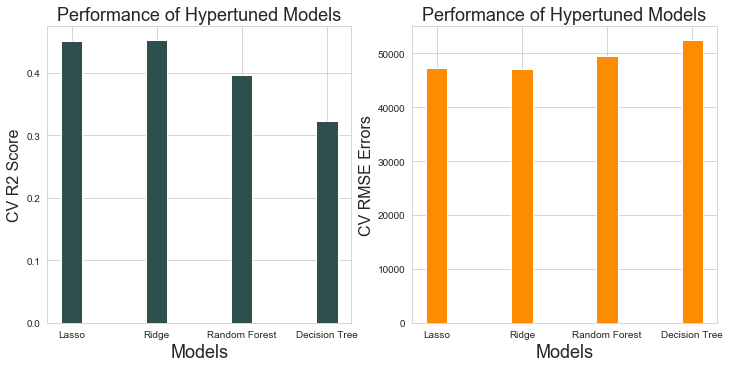

In [93]:
#creating two subplots
fig = plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
#plotting the R2 values
plt.bar(np.arange(4), Total_R2_Results, width = 0.25, color = 'darkslategray')
plt.xticks(np.arange(4), ("Lasso","Ridge", "Random Forest", "Decision Tree"))
plt.ylabel('CV R2 Score',fontsize=16)
plt.xlabel('Models',fontsize=18)
plt.title('Performance of Hypertuned Models', fontsize=18)

plt.subplot(2, 2, 2)
#plotting the RMSE values
plt.bar(np.arange(4), Total_RMSE_Results, width = 0.25, color = 'darkorange')
plt.xticks(np.arange(4), ("Lasso","Ridge", "Random Forest", "Decision Tree"))
plt.ylabel('CV RMSE Errors',fontsize=16)
plt.xlabel('Models',fontsize=18)
plt.title('Performance of Hypertuned Models', fontsize=18)
plt.show()

Observation:

The Ridge model perform the best among the four models, it has a high R2 value and low RMSE value which indicates that it is a good model to perform testing on it.

All R2 and RMSE values after tunning improved, R2 values incerased and RMSE values decreased for all models.

# 6. Testing and discussion

In the past section, we have concluded that Ridge is the optimal alogarithm to make prediction for our data.

In [94]:
#optimal model 
optimal_model = tuned_results['Ridge_model']
coeff = optimal_model.coef_.tolist()

In [95]:
# again define the metric score function
def rmse(X_predi, Y_targ):
    return np.sqrt(((X_predi - Y_targ) ** 2).mean())

Test_Data_R2 = optimal_model.score(X_test, y_test)
Test_Data_RMSE = rmse(optimal_model.predict(X_test),y_test)

In [96]:
Train_Data_R2 = tuned_results["Ridge_score_R2"]
Train_Data_RMSE = tuned_results["Ridge_score_RMSE"]
Train_Data_RMSE = Train_Data_RMSE*-1

**Plot R2 and RMSE score for training and testing data**

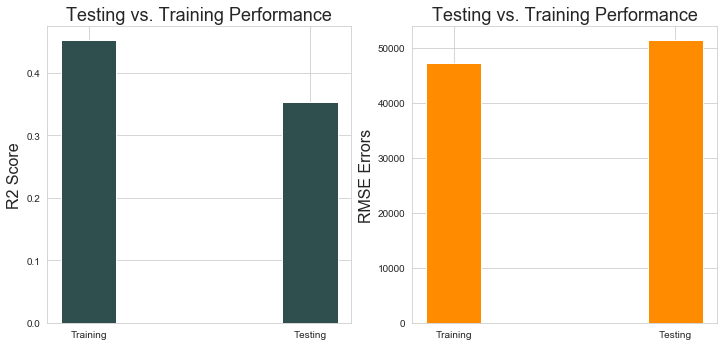

In [99]:
#creating a dummy variable as a place holder
x = np.arange(2)
#creating two subplots
fig = plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
#plotting the R2 values
plt.bar(x , [Train_Data_R2 , Test_Data_R2], width = 0.25, color='darkslategray')
plt.xticks(np.arange(2), ('Training','Testing'))
plt.ylabel('R2 Score',fontsize=16)
plt.title('Testing vs. Training Performance', fontsize=18)

plt.subplot(2, 2, 2)
#plotting the RMSE values
plt.bar(x, [Train_Data_RMSE, Test_Data_RMSE], width = 0.25,color = 'darkorange')
plt.xticks(np.arange(2), ('Training','Testing'))
plt.ylabel('RMSE Errors',fontsize=16)
plt.title('Testing vs. Training Performance', fontsize=18)
plt.show()

### Overall Fit of the Model

To understnad overall fit of the model, we plot the residual. 

**Observations from residual:**
1. The residual follows a normal distribution behaviour about ZERO, and small slight upper tail towards the negative end. 

2. It can be seen that model fits almost all the data as most of the spotted points are around the mean. 

3. There are some outliers points in both training and testing data and those represent the outliers. 

4. There is high bias in the model as some points in both triaing and testing data have very high residual.

5. There is low variance in the model as most of training and testing data overlap. 

**Overfitting or Underfitting:** 

From above residual plot observation, it can be concluded that model is underfitting dataset because we have a high bias.
Most possible reasons for underfitting is because of: 

1. The salary probably has a nonlinear relationship with the features and non linear models would perform better. 
3. Human error in completing the survey. 


Requirement already up-to-date: yellowbrick in c:\users\sahar\anaconda3\lib\site-packages (0.9.1)


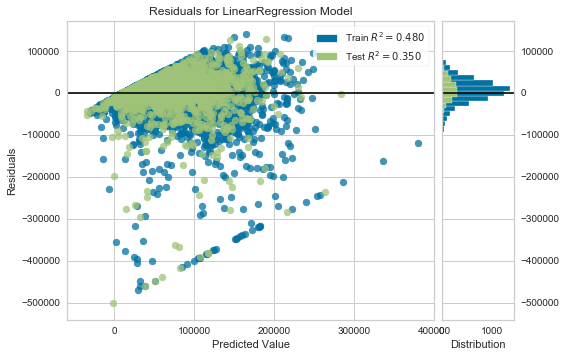

In [102]:
!pip install yellowbrick
!pip install -U yellowbrick
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = model
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()        

#### How to increase accuracy of model?

1. Better Removal of outliers from the data  
2. Improve Imputation Techniques 
3. Reduction of features using more sophisticated models 
4. better repesentation of the earning : earnings are different between countries during difference in cost of living so it makes no sense to compare apple with oranges : the salary column should have been adjusted to a vlaue that acounts for differences in Cost of living or the moel should only focus on a specific country. 
5. Use different models 
    1. Neural Networks. 
    2. Ensemble models are combining multiple models to improve the accuracy using bagging and boosting. This ensembling can improve the predictive performance more than any single model. 
    

# Bonus Neural Networks 

**Data Preprocessing**
The neural network in Python may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training the model**
Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

In [104]:
from sklearn.neural_network import MLPRegressor

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. There are many ways to choose these numbers, but for simplicity we will choose 3 layers with the same number of neurons as there are features in our data set along with 500 max iterations.

In [105]:
reg = MLPRegressor(hidden_layer_sizes=(190,190,190),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=500, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

Now that the model has been made we can fit the training data to our model, remember that this data has already been processed and scaled:

In [106]:
reg.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(190, 190, 190), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [107]:
y_test = reg.predict(X_test)

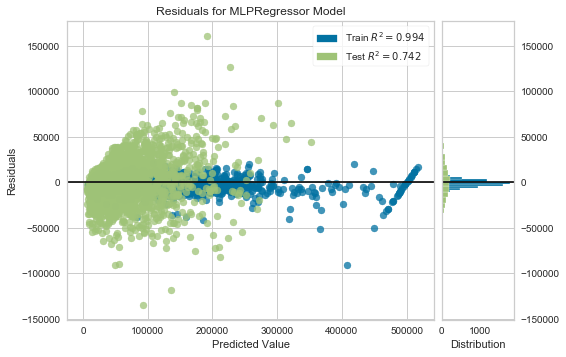

In [108]:
# Instantiate the linear model and visualizer
model = reg
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

**Observations from residual:**
1. The residual follows a normal distribution behaviour about ZERO, and small slight upper tail towards the negative end. 

2. It can be seen that model has low variance but high bias . 

3. Many of the salaries above 200000 values not well predicted


**Overfitting or Underfitting:** 

From above residual plot observation, it can be concluded that model is overfitting dataset because we have a high variance.


Issues with neural networkds they are vey hard to converge and may fall into a local minima 